## Проект: Линейные модели в машинном обучении


Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Нужно создать две прогнозные модели для отбора бурёнок в поголовье:

- Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
- Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

### Описание данных
Вот какие данные есть в трех датасетах:

**ferma_main.csv**

- id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

**ferma_dad.csv**
- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.

**cow_buy.csv**
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

### Особенности датафрейма cow_buy.csv

Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%. Кроме того, отсутствуют признаки Удой, кг и Вкус молока. **Это целевые признаки, именно их предстоит предсказать!**

### План работы будет следующим:

**1. Изучение и предобработка данных**

Посмотрим на содержание датафреймов, изучим, какие типы данных и их объем он содержит. Определим, соответствуют ли они описанию задачи и стандартам оформления данных.


**2. Предобработка данных**

Проверим данные на наличие пропусков и дубликатов. Узнаем, корректны ли типы данных у каждого признака. При необходимости устраним все проблемы с данными.

**3. Исследовательский анализ данных**

Проведем статистический анализ всех признаков. Построим графики для каждого признака. Посмотрим, есть ли выбросы, необычное распределение количественных признаков или другие особенности.


**4. Корреляционный анализ признаков в датасете ferma_main.csv**

Изучим взаимосвязь между признаками, построим scatterplot для признака Удой, кг и всех количественных признаков. Сделаем выводы о взаимосвязи признаков.


**5. Задача регрессии**

Пройдем все этапы моделирования модели и обучим три модели простой линейной регрессии. Проверим их работу и получим прогноз удоя коров.


**6. Задача классификации**

Пройдем все этапы моделирования модели и обучим модель логистической регрессии. Проверим ее работу и получим прогноз вкуса молока коров.

**7. Общие выводы**

Отберем коров, для которых спрогнозирован удой более 6000 кг в год и вкусное молоко. Коротко опишем результаты работы моделей для фермера и сделаем выводы о моделях линейной регрессии и логистической регрессии.

In [1]:
import os
import pandas as pd
import math
from scipy import stats
import sklearn
from sklearn.compose import ColumnTransformer
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
from termcolor import colored
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    r2_score, mean_squared_error, 
    mean_absolute_error, accuracy_score, 
    recall_score, precision_score,
    confusion_matrix
)

pd.options.mode.chained_assignment = None

Создадим необходимые функции:
- функцию для выводы первичной информации по таблице (пропуски, дубли, название категорий….)
- функцию для построения гистограммы и ящика с усами для каждого количественного фактора
- функцию для подсчета метрик под корреляционный анализ
- функцию под машинное обучение 

In [2]:
#функция для вывода первичной информации
def quick_info(df):
    print(colored('Общая информация:', 'red', attrs=['bold']))
    print(df.info())
    
    print(colored('Статистика по числовым данным:', 'red', attrs=['bold']))
    print(df.describe())
    
    print(colored('Пропуски данных:', 'red', attrs=['bold']))
    print(df.isnull().sum())
    
    print(colored('Дубликаты:', 'red', attrs=['bold']))
    print(df.duplicated().sum())
    
    print(colored('Уникальные значения:', 'red', attrs=['bold']))
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"{column}: {unique_values[:5]}{'...' if len(unique_values) > 5 else ''}")
    
    print(colored('Количество уникальных значений:', 'red', attrs=['bold']))
    print(df.nunique())
    
#функция для построения гистограммы и ящика с усами для каждого количественного фактора
def histbox(df):
   
    #Оставим только количественные признаки
    numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

    #Определим количество строк и столбцов для subplots
    num_rows = len(numeric_features)
    num_cols = 2  # Для гистограммы и ящика с усами

    #Создадим subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    
    #Построим гистограммы и ящики с усами
    for i, feature in enumerate(numeric_features):
        sns.histplot(df[feature], bins=80, ax=axes[i, 0])
        axes[i, 0].set_title(f'Гистограмма для {feature}')

        sns.boxplot(x=df[feature], ax=axes[i, 1])
        axes[i, 1].set_title(f'Боксплот для {feature}')

    plt.tight_layout()
    plt.show()

#функция для подсчета метрик корреляции
def correlation(df):
    
    #Вычислим матрицу корреляций
    corr_matrix = df.corr(method='spearman')

    #Создадим тепловую карту корреляций
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Тепловая карта корреляции с коэффициентом Спирмена')
    plt.show()
    
#функция для машинного обучения при линейной регрессии  
def train_and_predict(df, features, target, random_state=42):
    # Разделим на признаки и целевую переменную
    X = df[features]
    y = df[target]

    # Определем числовые и категориальные признаки
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()
    numeric_features = X.select_dtypes(include=['number']).columns.tolist()

    # Создадим StandardScaler под числовые признаки
    scaler = StandardScaler()
    X_numeric_scaled = scaler.fit_transform(X[numeric_features])

    # Создадим OneHotEncoder под категориальные признаки
    encoder = OneHotEncoder(drop='first', sparse=False)
    X_encoded = encoder.fit_transform(X[categorical_features])

    # Объединим числовые и закодированные категориальные признаки
    X_processed = np.hstack((X_numeric_scaled, X_encoded))

    # Разделим на тренировочную и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=random_state)

    # Обучим модель
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Проверим accuracy на тестовой выборке
    r2 = model.score(X_test, y_test)
    print(f'Параметр детерминации для модели: {r2:.3f}')

    return model, scaler, encoder


### Шаг 1. Загрузка и знакомство с данными

Загрузим все три датафрейма и посмотрим на первые пять строк каждого.

In [3]:
pth_fmain_1 = '/Users/macbookpro/Downloads/ferma_main.csv'
pth_fmain_2 = '/datasets/ferma_main.csv'

if os.path.exists(pth_fmain_1):
    ferma_main = pd.read_csv(pth_fmain_1, sep=';', decimal= '.')
elif os.path.exists(pth_fmain_2):
    ferma_main = pd.read_csv(pth_fmain_2, sep=';', decimal= '.')
else:
    print('Что-то не так')
display(ferma_main.head(5))

pth_cowbuy_1 = '/Users/macbookpro/Downloads/cow_buy.csv'
pth_cowbuy_2 = '/datasets/cow_buy.csv'

if os.path.exists(pth_cowbuy_1):
    cow_buy = pd.read_csv(pth_cowbuy_1, sep=';', decimal= '.')
elif os.path.exists(pth_cowbuy_2):
    cow_buy = pd.read_csv(pth_cowbuy_2, sep=';', decimal= '.')
else:
    print('Что-то не так')
display(cow_buy.head(5))

pth_dad_1 = '/Users/macbookpro/Downloads/ferma_dad.csv'
pth_dad_2 = '/datasets/ferma_dad.csv'

if os.path.exists(pth_dad_1):
    ferma_dad = pd.read_csv(pth_dad_1, sep=';', decimal= '.')
elif os.path.exists(pth_dad_2):
    ferma_dad = pd.read_csv(pth_dad_2, sep=';', decimal= '.')
else:
    print('Что-то не так')
display(ferma_dad.head(5))
   

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [4]:
print(colored('Информация о основном датафрейме фермы:', 'red', attrs=['bold']))
quick_info(ferma_main)

Информация о основном датафрейме фермы:
Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                 

In [5]:
print(colored('Информация о датафрейме c коровами на покупку:', 'red', attrs=['bold']))
quick_info(cow_buy)

Информация о датафрейме c коровами на покупку:
Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB
None
Статистика по числовым данным:
                 Порода Тип пастбища порода папы_быка Имя_папы  \
count                20           20               20       20   
unique                2            2                2        4   
top     РефлешнСоверинг    равнинное          Соверин   Буйный   
freq            

In [6]:
print(colored('Информация о датафрейме с именем папы:', 'red', attrs=['bold']))
quick_info(ferma_dad)

Информация о датафрейме с именем папы:
Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None
Статистика по числовым данным:
              id
count  629.00000
mean   315.00000
std    181.72094
min      1.00000
25%    158.00000
50%    315.00000
75%    472.00000
max    629.00000
Пропуски данных:
id          0
Имя Папы    0
dtype: int64
Дубликаты:
0
Уникальные значения:
id: [1 2 3 4 5]...
Имя Папы: ['Буйный' 'Соловчик' 'Барин' 'Геркулес']
Количество уникальных значений:
id          629
Имя Папы      4
dtype: int64


### Выводы:

1. В основном датафрейме фермы 12 столбцов и 634 строки. Он содержит данные о коровах стада, включая удой, массу молока, которую корова дает за год, породу коровы и ее папы и так далее.


2. В датафрейме с именем папы коровы две колонки и 629 строк. Она содержит id и имя папы коровы.


3. В датафрейме с коровами для изучения перед покупкой 7 столбцов и 20 строк. Он содержит породу коровы и ее папы, возраст, содержание жиров и белков в молоке и так далее.


4. Мы видим, что названия столбцов во всех датафреймах нужно будет привести к змеиному регистру для единства стиля. Названия столбцовнужно будет перевести на английский для удобства и красоты кода.


5. Признаки "порода", "Тип пастбища", "порода папы_быка", "Имя_папы", "Вкус молока", "Возраст" являются категориальными.


6. Во многих столбцах типы объектов object. Это значит, что в них содержатся разные типы данных. Эту проблемы нужно будет исправить на предобработке.


7. Пропуски данных пока не видны, но в основном датафрейме показывает пять дубликатов, а в датафрейме с коровами на покупку - 4.


7. Пока кажется, что данных для решения бизнес-задач хватает. У нас есть информация о породах коров, типах пастбища, на которых они пасутся, уровням жирности и белка в молоке. Как минимум можно будет сопоставить эти данные с текущим поголовьем фермы.


8. Мы видим, что данные в столбцах ЭКЕ, столбцах с данными по жирности и количеству белка, СПО стоит из object привести к типу float64, если в них нет буквенных значений и NaN.

### Шаг 2. Предобработка данных

Сперва приведем названия столбцов во всех датафреймах к одному формату змеиного регистра. Заодно переведем каждое из названий колонок.

In [7]:
titles_main = ['id', 'udoy', 'eke', 'raw_protein', 'spo', 'poroda', 'pastbische', 
               'poroda_papa','zhirnost', 'belok', 'vkus', 'vozrast']

ferma_main.columns = titles_main

titles_cowbuy = ['poroda', 'pastbische', 'poroda_papa', 'imya_papa', 'zhirnost', 
                 'belok','vozrast']
    
cow_buy.columns = titles_cowbuy

titles_dad = ['id', 'imya_papa']
ferma_dad.columns = titles_dad

display(ferma_main.head(2))
display(cow_buy.head(2))
display(ferma_dad.head(2))

,id,udoy,eke,raw_protein,spo,poroda,pastbische,poroda_papa,zhirnost,belok,vkus,vozrast
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет


,poroda,pastbische,poroda_papa,imya_papa,zhirnost,belok,vozrast
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет


,id,imya_papa
0,1,Буйный
1,2,Соловчик


Изучим датафреймы на наличие NaN и явных дубликатов: 

In [8]:
print(colored('Информация о пропусках в основном датафрейме фермы:', 'red', attrs=['bold']))
print(ferma_main.isnull().sum())
print(f'Количество дубликатов в основном датафрейме фермы: {ferma_main.duplicated().sum()}')
print()
print(colored('Информация о пропусках в датафрейме с коровами для изучения перед покупкой:', 'red', attrs=['bold']))
print(cow_buy.isnull().sum())
print(f'Количество дубликатов в датафрейме с коровами для изучения перед покупкой: {cow_buy.duplicated().sum()}')
print()
print(colored('Информация о пропусках в датафрейме с именем папы коровы:', 'red', attrs=['bold']))
print(ferma_dad.isnull().sum())
print(f'Количество дубликатов в датафрейме с именем папы коровы: {ferma_dad.duplicated().sum()}')

Информация о пропусках в основном датафрейме фермы:
id             0
udoy           0
eke            0
raw_protein    0
spo            0
poroda         0
pastbische     0
poroda_papa    0
zhirnost       0
belok          0
vkus           0
vozrast        0
dtype: int64
Количество дубликатов в основном датафрейме фермы: 5

Информация о пропусках в датафрейме с коровами для изучения перед покупкой:
poroda         0
pastbische     0
poroda_papa    0
imya_papa      0
zhirnost       0
belok          0
vozrast        0
dtype: int64
Количество дубликатов в датафрейме с коровами для изучения перед покупкой: 4

Информация о пропусках в датафрейме с именем папы коровы:
id           0
imya_papa    0
dtype: int64
Количество дубликатов в датафрейме с именем папы коровы: 0


Посмотрим повнимательнее на явные дубликаты. Особенно это важно в случае с датафрейме с коровами для изучения перед покупкой: там всего 20 строк, и удалять лишнее совершенно не хочется.

In [9]:
display(ferma_main[ferma_main.duplicated()])
display(cow_buy[cow_buy.duplicated()])

,id,udoy,eke,raw_protein,spo,poroda,pastbische,poroda_papa,zhirnost,belok,vkus,vozrast
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
633,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


,poroda,pastbische,poroda_papa,imya_papa,zhirnost,belok,vozrast
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


Мы видим, что в случае с основным датафреймом найденные дубликаты действительно совпадают во всех строках, даже по id. Можно сделать вывод, что эти строки относятся к одной корове: их можно удалить.

В случае с датафреймом с коровами для изучения перед покупкой не все так однозначно: да, данные в строках 8 и 14 полностью совпадают. Тем не менее, это может быть информация про двух разных коров: в этом датафрейме нет id коровы, а сами данные в датафрейме в целом не слишком отличаются для разных коров. Поэтому их удалять пока не будем.

In [10]:
#отбросим дубликаты из основного датафрейма
ferma_main = ferma_main.drop_duplicates(subset=['id'], keep='first')
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           629 non-null    int64 
 1   udoy         629 non-null    int64 
 2   eke          629 non-null    object
 3   raw_protein  629 non-null    int64 
 4   spo          629 non-null    object
 5   poroda       629 non-null    object
 6   pastbische   629 non-null    object
 7   poroda_papa  629 non-null    object
 8   zhirnost     629 non-null    object
 9   belok        629 non-null    object
 10  vkus         629 non-null    object
 11  vozrast      629 non-null    object
dtypes: int64(3), object(9)
memory usage: 63.9+ KB


Чтобы отбросить шанс других неявных дубликатов, посчитаем уникальные значения по id в основном датафрейме:

In [11]:
print(f'Количество уникальных id в датафрейме: {ferma_main.id.value_counts().sum()}')

Количество уникальных id в датафрейме: 629


Посмотрим на значения в столбцах, которые стоит привести к типу float64.

In [12]:
print(ferma_main['eke'].value_counts())
print()
print(ferma_main['spo'].value_counts())
print()
print(ferma_main['zhirnost'].value_counts())
print()
print(ferma_main['belok'].value_counts())

14,7    27
15,7    24
15,6    23
14,6    23
15,8    19
14,2    18
15,3    18
15,2    18
16,4    17
15,5    17
14,9    16
13,4    16
13,2    16
15,1    16
14,4    15
14,1    15
16,3    15
16,2    15
13,9    15
15,4    15
13,5    14
14,8    14
13,7    14
15,9    14
16,5    14
13,8    13
13,1    13
12,9    12
12,8    11
16,1    10
13,6    10
13,3    10
14,5    10
16,7    10
12,7     9
14,3     9
11,9     9
12,3     8
12,4     8
12,5     7
14       7
15       6
11,8     6
16,6     6
12,1     5
12,6     5
12,2     5
16,8     3
13       2
16       2
11,7     1
10,9     1
11,1     1
11,5     1
12       1
Name: eke, dtype: int64

0,94     172
0,93     141
0,89      94
0,88      58
0,95      55
0,84      25
0,86      25
0,895     23
0,85      17
0,885     15
0,96       3
0,9        1
Name: spo, dtype: int64

3,72    112
3,73     78
3,71     78
3,63     37
3,64     36
3,61     35
3,62     31
3,59     25
3,65     19
3,74     16
3,7      13
3,58     11
3,27     10
3,42     10
3,18      9
3,48     

Мы видим, что значения в этих столбцах можно перевести в float64: нет буквенных значений и NaN. При этом есть ошибки, которые стоит исправить перед преобразованием: запятая вместо точки в числах. Исправим это во всех столбцах.

Кроме того, при изучении вылезли неявные дубликаты: 'Айдиал' и 'Айдиалл', 'равнинное' и 'равнинные'. Заодно почистим датафрейм от них.

In [13]:
ferma_main = ferma_main.replace(',', '.', regex=True)

ferma_main['poroda_papa'] = ferma_main['poroda_papa'].replace('Айдиалл', 'Айдиал')

ferma_main['poroda'] = ferma_main['poroda'].replace('Вис Бик Айдиал', 'ВисБикАйдиал')
                       
ferma_main['vkus'] = ferma_main['vkus'].replace('не вкусно', 'невкусно')
            
ferma_main['pastbische'] = (ferma_main['pastbische'].replace('Равнинные', 'равнинное')
                            .replace('Равнинное', 'равнинное')
                            .replace('Холмистое', 'холмистое')
                            .replace('холмистые', 'холмистое')
                           )
                            
cow_buy['poroda'] = cow_buy['poroda'].replace('Вис Бик Айдиал', 'ВисБикАйдиал')

cow_buy['pastbische'] = cow_buy['pastbische'].replace('Равнинные', 'Равнинное')


display(ferma_main.head(10))
display(cow_buy.head(2))

,id,udoy,eke,raw_protein,spo,poroda,pastbische,poroda_papa,zhirnost,belok,vkus,vozrast
0,1,5863,14.2,1743,0.89,ВисБикАйдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.89,ВисБикАйдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,невкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.4,3.075,невкусно,более_2_лет
4,5,5302,12.8,1675,0.885,ВисБикАйдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,ВисБикАйдиал,равнинное,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.93,ВисБикАйдиал,равнинное,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.94,РефлешнСоверинг,холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,ВисБикАйдиал,холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


,poroda,pastbische,poroda_papa,imya_papa,zhirnost,belok,vozrast
0,ВисБикАйдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,ВисБикАйдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет


Повторим то же самое для cow_buy:

In [14]:
print(cow_buy['zhirnost'].value_counts())
print()
print(cow_buy['belok'].value_counts())

3,73    3
3,4     3
3,59    3
3,64    2
3,58    2
3,57    1
3,63    1
3,42    1
3,34    1
3,68    1
3,54    1
3,77    1
Name: zhirnost, dtype: int64

3,074    5
3,079    3
3,076    2
3,053    2
3,073    1
3,046    1
3,055    1
3,081    1
3,069    1
3,075    1
3,061    1
3,065    1
Name: belok, dtype: int64


In [15]:
cow_buy = cow_buy.replace(',', '.', regex=True)

cow_buy.head()

,poroda,pastbische,poroda_papa,imya_papa,zhirnost,belok,vozrast
0,ВисБикАйдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,ВисБикАйдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.4,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Переведем значения в float64:

In [16]:
ferma_main[['eke', 'spo', 'zhirnost', 'belok']] = ferma_main[['eke', 'spo', 
                                                              'zhirnost', 'belok']].apply(pd.to_numeric)
ferma_main.info()
print()
cow_buy[['zhirnost', 'belok']] = cow_buy[['zhirnost', 'belok']].apply(pd.to_numeric)
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           629 non-null    int64  
 1   udoy         629 non-null    int64  
 2   eke          629 non-null    float64
 3   raw_protein  629 non-null    int64  
 4   spo          629 non-null    float64
 5   poroda       629 non-null    object 
 6   pastbische   629 non-null    object 
 7   poroda_papa  629 non-null    object 
 8   zhirnost     629 non-null    float64
 9   belok        629 non-null    float64
 10  vkus         629 non-null    object 
 11  vozrast      629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   poroda       20 non-null     object 
 1   pastbische

Ранее мы заметили, что часть столбцов несут данные о категориальных признаках с бинарными или множественными значениями. Посмотрим, в каких столбцах лежат такие данные, чтобы сделать мысленную памятку для следующего этапе при обработке данных для МО.

In [17]:
print(ferma_main['poroda'].value_counts())
print()
print(ferma_main['pastbische'].value_counts())
print()
print(ferma_main['poroda_papa'].value_counts())
print()
print(ferma_main['vkus'].value_counts())
print()
print(ferma_main['vozrast'].value_counts())
print()
print(cow_buy['poroda'].value_counts())
print()
print(cow_buy['pastbische'].value_counts())
print()
print(cow_buy['poroda_papa'].value_counts())
print()
print(cow_buy['imya_papa'].value_counts())
print()
print(cow_buy['vozrast'].value_counts())
print()
print(ferma_dad['imya_papa'].value_counts())

ВисБикАйдиал       373
РефлешнСоверинг    256
Name: poroda, dtype: int64

холмистое    351
равнинное    278
Name: pastbische, dtype: int64

Айдиал     318
Соверин    311
Name: poroda_papa, dtype: int64

вкусно      371
невкусно    258
Name: vkus, dtype: int64

более_2_лет    519
менее_2_лет    110
Name: vozrast, dtype: int64

РефлешнСоверинг    11
ВисБикАйдиал        9
Name: poroda, dtype: int64

равнинное    11
холмистое     9
Name: pastbische, dtype: int64

Соверин    12
Айдиал      8
Name: poroda_papa, dtype: int64

Буйный      8
Геркулес    6
Барин       4
Соловчик    2
Name: imya_papa, dtype: int64

более_2_лет    15
менее_2_лет     5
Name: vozrast, dtype: int64

Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: imya_papa, dtype: int64


Финально на этом этапе вглянем на содержимое датасетов и информацию про каждый из них, вдруг что-то упустили:

In [18]:
display(ferma_main.head(2))
display(ferma_main.info())
display(cow_buy.head(2))
display(cow_buy.info())
display(ferma_dad.head(2))
display(ferma_dad.info())

,id,udoy,eke,raw_protein,spo,poroda,pastbische,poroda_papa,zhirnost,belok,vkus,vozrast
0,1,5863,14.2,1743,0.89,ВисБикАйдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.89,ВисБикАйдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           629 non-null    int64  
 1   udoy         629 non-null    int64  
 2   eke          629 non-null    float64
 3   raw_protein  629 non-null    int64  
 4   spo          629 non-null    float64
 5   poroda       629 non-null    object 
 6   pastbische   629 non-null    object 
 7   poroda_papa  629 non-null    object 
 8   zhirnost     629 non-null    float64
 9   belok        629 non-null    float64
 10  vkus         629 non-null    object 
 11  vozrast      629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


None

,poroda,pastbische,poroda_papa,imya_papa,zhirnost,belok,vozrast
0,ВисБикАйдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,ВисБикАйдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   poroda       20 non-null     object 
 1   pastbische   20 non-null     object 
 2   poroda_papa  20 non-null     object 
 3   imya_papa    20 non-null     object 
 4   zhirnost     20 non-null     float64
 5   belok        20 non-null     float64
 6   vozrast      20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

,id,imya_papa
0,1,Буйный
1,2,Соловчик


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         629 non-null    int64 
 1   imya_papa  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

****Промежуточный вывод по предобработке****

1. Мы привели названия столбцов во всех датафреймах к одному формату змеиного регистра. При этом в названиях столбцов решено было русский перевести на английский ради единства стиля и удобочитаемости.


2. В ходе предобработки выявили явные дубликаты в основном датафрейме и удалили их. Предварительный анализ показал явные дубликаты и в датафрейме с коровами для изучения перед покупкой. Но во втором случае это может быть информация про двух разных коров: в этом датафрейме нет id коровы, а сами данные в целом не слишком отличаются для разных коров. Поэтому их решили не удалять.


3. Выявили неявные дубликаты в основном датафрейме: 'Айдиал' и 'Айдиалл', 'равнинное' и 'равнинные'. Почистили датафрейм от них.


4. Привели к корректному типу данные по датафрейму: заменили object на float64 в столбцах с количественными значениями.

### Шаг 3. Исследовательский анализ данных

Построим боксплоты для столбцов в основном датафрейме с помощью функции:

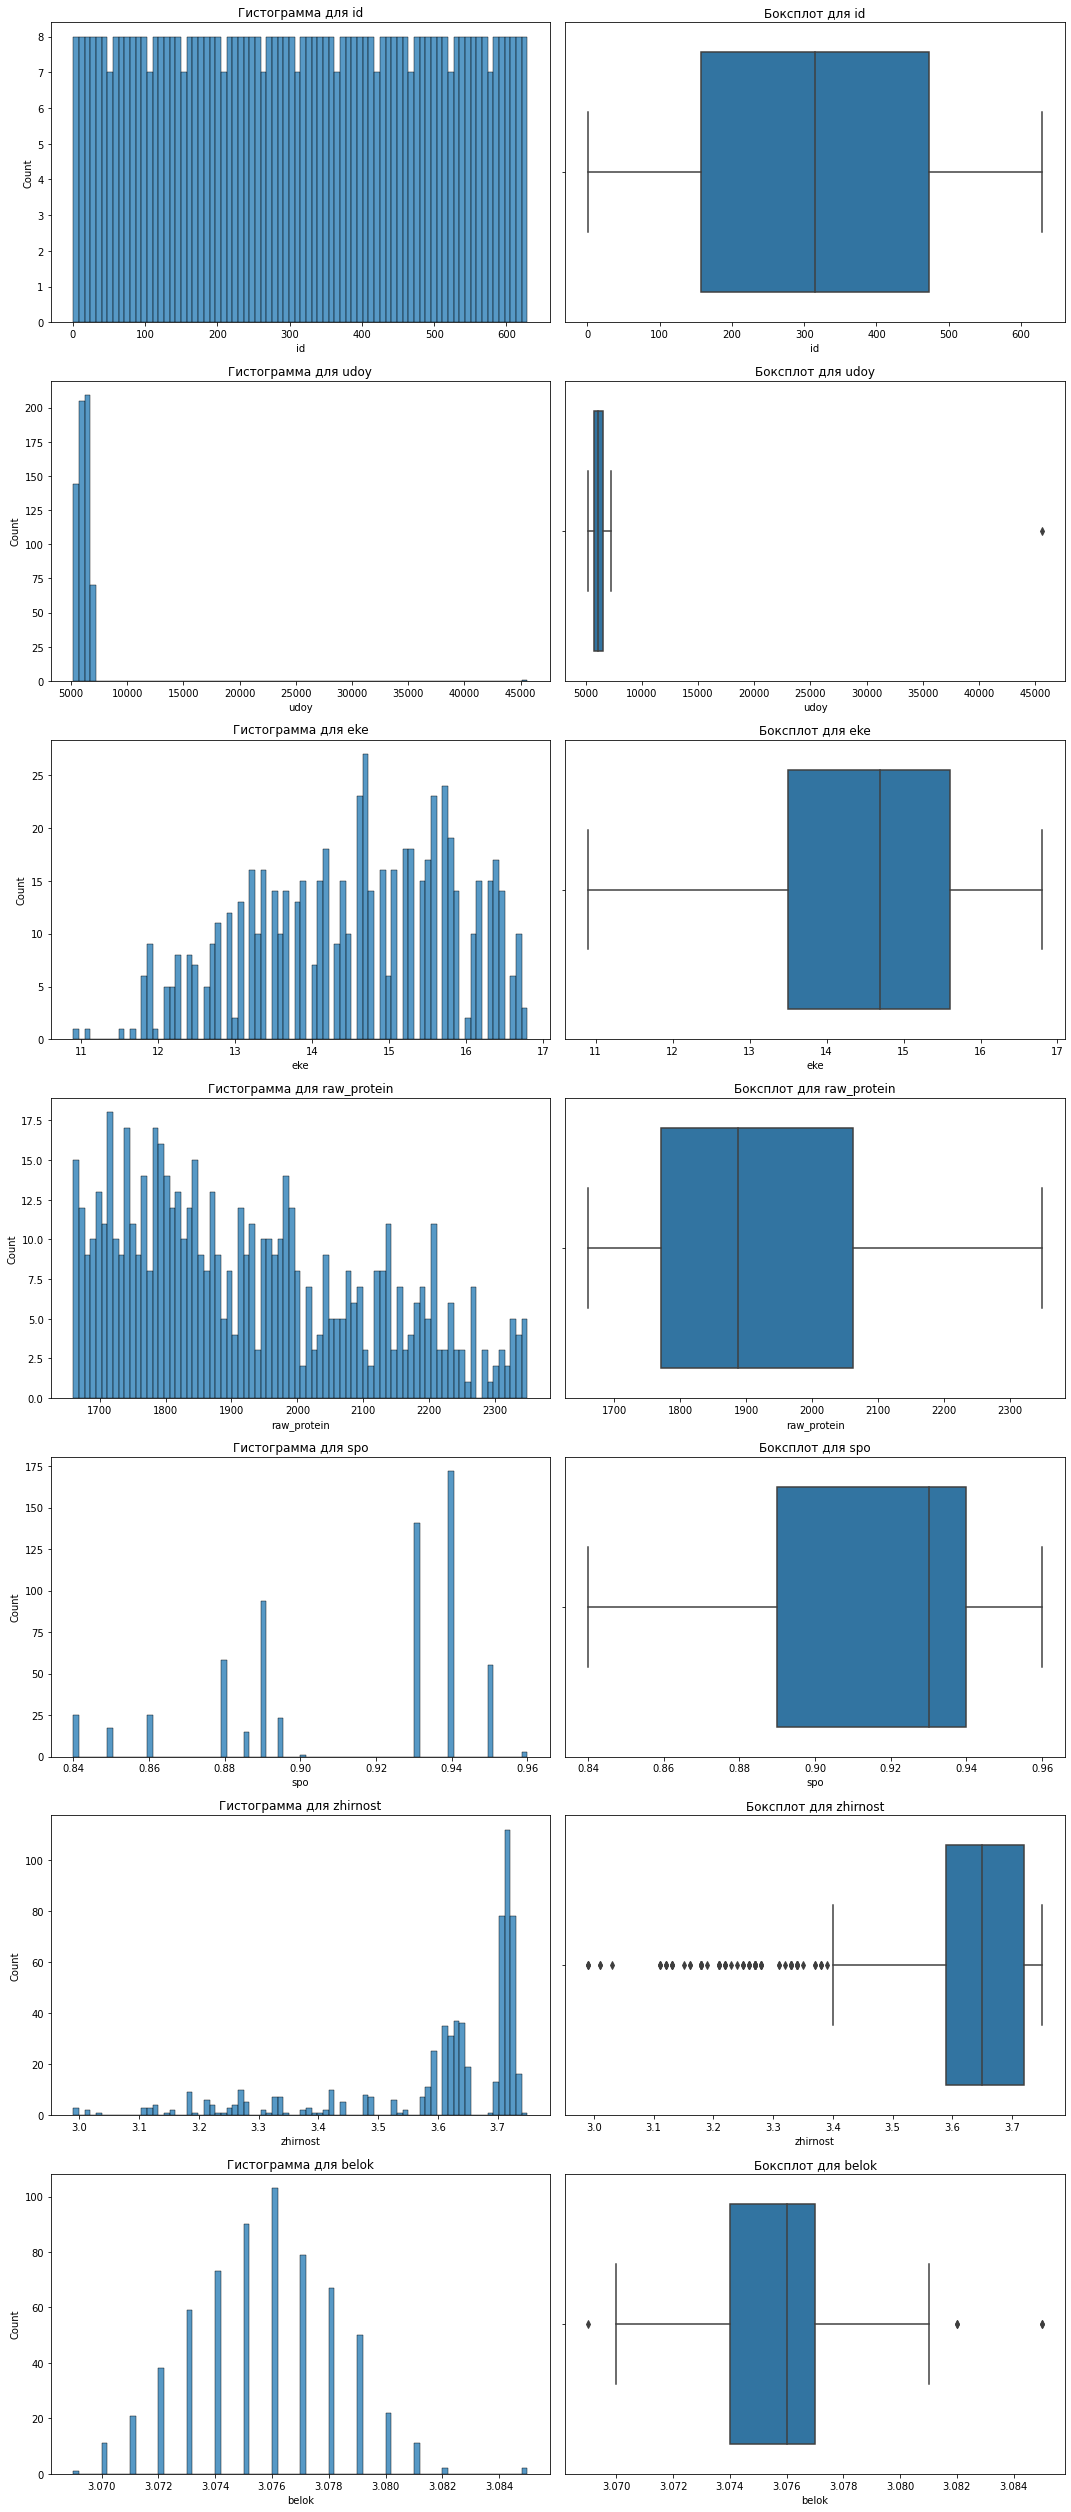

In [19]:
histbox(ferma_main)

Ящики с усами для количественных признаков основного датафрейма помогли определить, что возможные выбросы по показателям есть у удоя, процента жирности и процента белка в молоке. Изучим их с помощью describe:

In [20]:
ferma_main.describe()

,id,udoy,eke,raw_protein,spo,zhirnost,belok
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Мы видим, что у показателя удоя есть аномальные значения: более 45 тонн молока в год от одной коровы при среднем в 6,2 тонны. При дальнейшем анализе установим лимиты для нового датасета, вот правила: 

1. Будем пользоваться значениями удоя, не превышающими 8000 тонн в год

В случае с жирностью то, что ящик с усами определил как выбросы, на практике аномальными значениями не кажутся: так как разброс показателей здесь меньше, чувствительность метода увеличилась.  

Мы также можем выделить средние значения для каждого из количественных признаков: ЭКЕ 14,5, сырой протеин - 1,9 кг, СПО - 0,9, жирность - 3.6%, белок - 3%.

Установим лимиты в новом датасете udoy_lim:

In [21]:
udoy_lim = ferma_main.query('udoy <= 8000')
udoy_lim.head()

,id,udoy,eke,raw_protein,spo,poroda,pastbische,poroda_papa,zhirnost,belok,vkus,vozrast
0,1,5863,14.2,1743,0.890,ВисБикАйдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,ВисБикАйдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,невкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,невкусно,более_2_лет
4,5,5302,12.8,1675,0.885,ВисБикАйдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


Визуализируем каждый из признаков основного датафрейма:

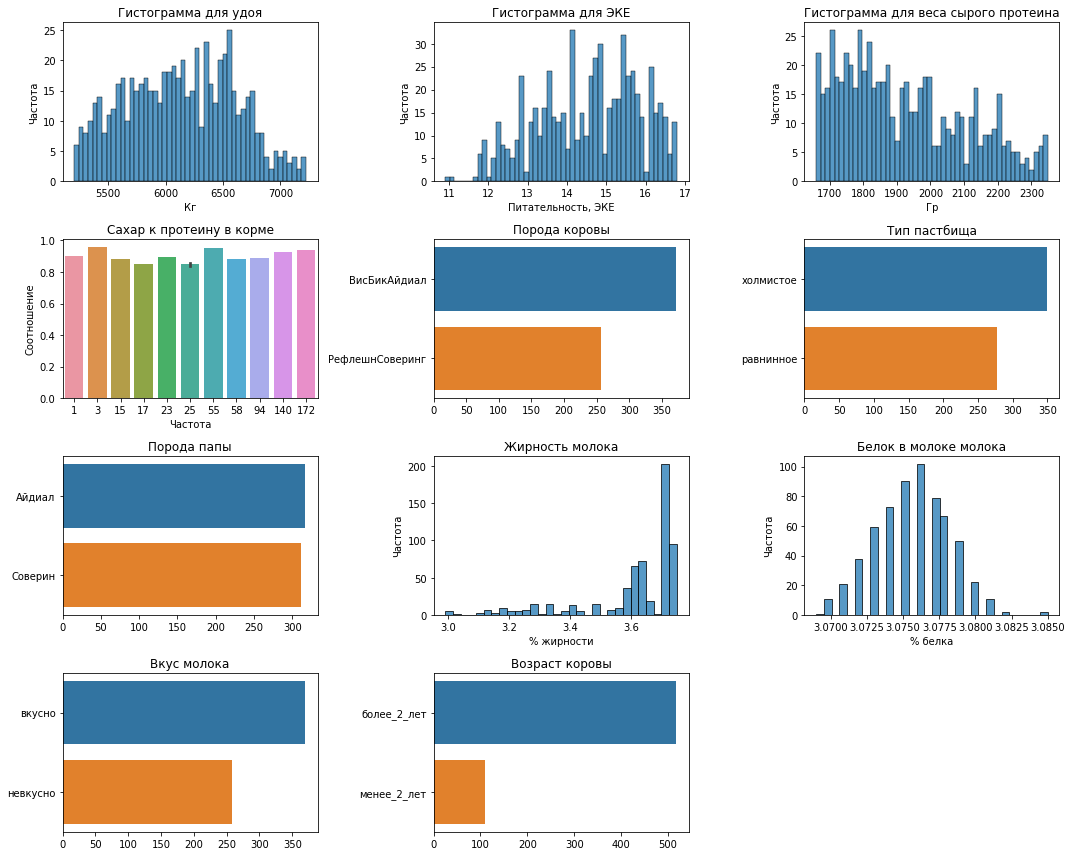

In [22]:
spo_count = udoy_lim['spo'].value_counts()
poroda = udoy_lim['poroda'].value_counts()
pastbische = udoy_lim['pastbische'].value_counts()
poroda_papy = udoy_lim['poroda_papa'].value_counts()
vkus = udoy_lim['vkus'].value_counts()
vozrast = udoy_lim['vozrast'].value_counts()

fig, ax = plt.subplots(4, 3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

sns.histplot(udoy_lim['udoy'], bins=50, ax=ax[0, 0])
ax[0, 0].set_title('Гистограмма для удоя')
ax[0, 0].set_ylabel('Частота')
ax[0, 0].set_xlabel('Кг')

sns.histplot(udoy_lim['eke'], bins=50, ax=ax[0, 1])
ax[0, 1].set_title('Гистограмма для ЭКЕ')
ax[0, 1].set_ylabel('Частота')
ax[0, 1].set_xlabel('Питательность, ЭКЕ')

sns.histplot(udoy_lim['raw_protein'], bins=50, ax=ax[0, 2])
ax[0, 2].set_title('Гистограмма для веса сырого протеина')
ax[0, 2].set_ylabel('Частота')
ax[0, 2].set_xlabel('Гр')

sns.barplot(x=spo_count.values, y=spo_count.index, ax=ax[1, 0])
ax[1, 0].set_title('Сахар к протеину в корме')
ax[1, 0].set_ylabel('Соотношение')
ax[1, 0].set_xlabel('Частота')

sns.barplot(x=poroda.values, y=poroda.index, ax=ax[1, 1])
ax[1, 1].set_title('Порода коровы')

sns.barplot(x=pastbische.values, y=pastbische.index, ax=ax[1, 2])
ax[1, 2].set_title('Тип пастбища')

sns.barplot(x=poroda_papy.values, y=poroda_papy.index, ax=ax[2, 0])
ax[2, 0].set_title('Порода папы')

sns.histplot(udoy_lim['zhirnost'], bins=30, ax=ax[2, 1])
ax[2, 1].set_title('Жирность молока')
ax[2, 1].set_ylabel('Частота')
ax[2, 1].set_xlabel('% жирности')

sns.histplot(udoy_lim['belok'], bins=30, ax=ax[2, 2])
ax[2, 2].set_title('Белок в молоке молока')
ax[2, 2].set_ylabel('Частота')
ax[2, 2].set_xlabel('% белка')

sns.barplot(x=vkus.values, y=vkus.index, ax=ax[3, 0])
ax[3, 0].set_title('Вкус молока')

sns.barplot(x=vozrast.values, y=vozrast.index, ax=ax[3, 1])
ax[3, 1].set_title('Возраст коровы')

ax[3, 2].set_axis_off()

plt.tight_layout()
plt.show()

**Предварительные выводы по данным в основном датафрейме:**
    
 1. Гистограмма по признаку удоя +- близка к нормальному распределению, но есть отдельные выбросы после 6500 кг. Удой за год начинает снижаться после значений примерно в 6600 кг в год.
 
 2. Гистограмма по ЭКЕ распределена ненормально, есть много выбросов и отдельных пиков. Вообще сам этот показатель вызывает вопросы: короткое исследование показало, что его обычно рассчитывают на 1 кг сухого рациона. В описании данных сейчас нет указания, в каких единицах он приведен и как вообще был рассчитан. 
 
 3. Гистограмма по граммовке протеина в корме тоже распределена ненормально, но здесь хотя бы понятна единица измерения.
 
 4. Чаще всего сахар к протеину в корме встречается в соотношениях от 0.88 до 0.94.
 
 5. По породам - немного чаще в поголовье встречаются коровы породы Вис Бик Айдиал (59.3%). Папы распределены по породам примерно одинаково: почти поровну и айдиалов, и соверинов.
 
 6. Немного чаще коровы в поголовье пасутся на холмистом пастбище (55.8%).
 
 7. Чаще всего показатель жирности молока приходится на значения от 3.6 до 3.8%.
 
 8. Самые частые показатели по проценту белка в молоке от 3.075 до 3.0775. 
 
 9. Коровы в поголовье чаще дают вкусное молоко (59%).
 
 10. В поголовье больше коров возрастом более двух лет (82.5%).

Повторим такой же анализ для датафрейма по коровам для покупки:

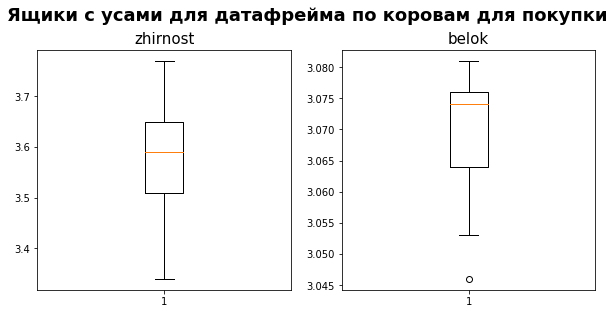

In [23]:
columns_buy = cow_buy[['zhirnost', 'belok']]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 15))
plt.subplots_adjust(hspace=0.2)
fig.suptitle("Ящики с усами для датафрейма по коровам для покупки", fontsize=18, y=0.92, fontweight='bold')

for n, col in enumerate(columns_buy):
    ax = plt.subplot(3, 2, n + 1)
    plt.boxplot(cow_buy[col])
    plt.title(col, fontsize=15)

In [24]:
print(colored('Статистическая информация о данных по коровам для покупки:', 'red', attrs=['bold']))
print(cow_buy.describe())
print()
print(colored('Статистическая информация о данных по коровам в поголовье:', 'red', attrs=['bold']))
print(cow_buy.describe())

Статистическая информация о данных по коровам для покупки:
        zhirnost      belok
count  20.000000  20.000000
mean    3.577500   3.069500
std     0.126818   0.010339
min     3.340000   3.046000
25%     3.510000   3.064000
50%     3.590000   3.074000
75%     3.650000   3.076000
max     3.770000   3.081000

Статистическая информация о данных по коровам в поголовье:
        zhirnost      belok
count  20.000000  20.000000
mean    3.577500   3.069500
std     0.126818   0.010339
min     3.340000   3.046000
25%     3.510000   3.064000
50%     3.590000   3.074000
75%     3.650000   3.076000
max     3.770000   3.081000


Мы видим, что показатели по жирности немного отличаются: среднее значение 3.57% вместо 3.6% в основном датафрейме с минимумом в 3.57 против 2.99. Содержание белка отличается в среднем меньше: 3.069 против 3.075 с минимумом в 3.046 против 3.069.

Визуализируем каждый из признаков: 

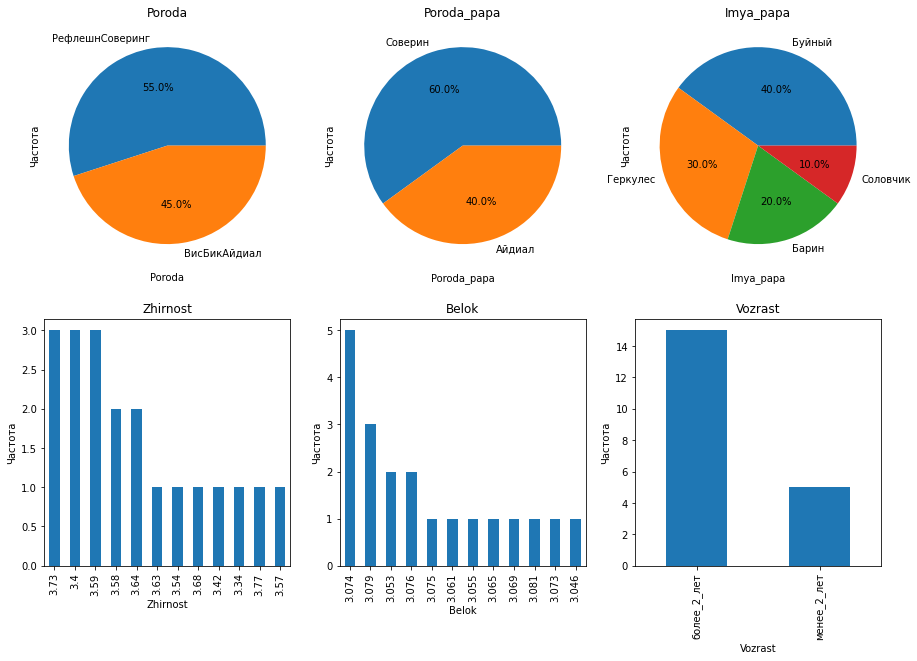

In [25]:
categorical_features = ['poroda', 'poroda_papa', 'imya_papa', 'zhirnost', 'belok', 'vozrast']

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

for i, feature in enumerate(categorical_features):
    if i < 3:
        cow_buy[feature].value_counts().plot.pie(ax=ax[0, i], autopct='%1.1f%%')
    else:
        cow_buy[feature].value_counts().plot.bar(ax=ax[1, i - 3])

    ax[i // 3, i % 3].set_title(f'{feature.capitalize()}')
    ax[i // 3, i % 3].set_ylabel('Частота')
    ax[i // 3, i % 3].set_xlabel(f'{feature.capitalize()}')

plt.show()

Предварительные выводы по данным о коровах на покупку:
    
 1. Среди них чуть больше коров породы Рефлешн Соверин (55%), чем Вис Бик Айдиал.
 
 2. Папы у этих коров чаще были породы Соверин (60%), чем Айдиал.
 
 3. Самое частое имя папы - Буйный (40%), на втором месте Геркулес (30%). Можно предположить, что это одни и те же самцы-отцы.
 
 4. Чаще всего показатель жирности молока приходится на значения 3.4, 3.59, 3.73%.
 
 5. Самые частые показатели по проценту белка в молоке 3.074, 3.079%. 
 
 6. Среди коров на покупку больше коров возрастом более двух лет (75%).

Визуализируем напоследок третий датафрейм:

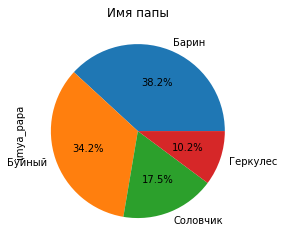

In [26]:
imya_papy_dad = ferma_dad['imya_papa'].value_counts()

ferma_dad['imya_papa'].value_counts().plot(y= imya_papy_dad, kind = 'pie', autopct='%1.1f%%')
plt.title('Имя папы')

plt.show()

Если предположить, что речь идет про одних и тех же быков-отцов, то больше всего коров в поголовье приходится на Барина (38.2%). На втором месте - Буйный (34.2%), на третьем - Соловчик (17.5%).

#### Предварительные выводы после исследовательского анализа данных:

1. В основном датафрейме у показателя удоя есть аномальные значения: более 45 тонн молока в год от одной коровы при среднем в 6,2 тонны. При дальнейшем анализе установим лимиты: будем пользоваться значениями, не превышающими 8 тонн в год.


2. Выделили средние значения для каждого из количественных признаков в основном датафрейме: ЭКЕ 14,5, сырой протеин - 1,9 кг, СПО - 0,9, жирность - 3,6%, белок - 3%.


3. Выделили средние значения для каждого из количественных признаков в датафрейме с коровами на покупку: жирность - 3,57%, белок - 3.069%.


4. Показатели по ЭКЕ распределены ненормально, есть много выбросов и отдельных пиков. Вообще сам этот показатель вызывает вопросы: непонятно, как его считали и что он отображает. Поэтому использовать в будущем его будем аккуратно.


5. Немного чаще в поголовье встречаются коровы породы Вис Бик Айдиал (59.3%). Среди коров на покупку чуть больше буренок породы Рефлешн Соверин (55%), чем Вис Бик Айдиал.


6. Папы у коров на покупку чаще были породы Соверин (60%), чем Айдиал. В поголовье папы распределены по породам примерно одинаково: почти поровну и айдиалов, и соверинов. Больше всего коров в поголовье родилось от Барина (38.2%). На втором месте - Буйный (34.2%), на третьем - Соловчик (17.5%). Среди коров на покупку самое частое имя папы - Буйный (40%), на втором месте Геркулес (30%).


7. И среди коров на покупку, и в поголовье больше буренок возрастом более двух лет (82.5 и 75%).


### Шаг 4. Корреляционный анализ признаков в основном датафрейме

Изучим матрицу корреляции для основного датафрейма, исключив из него аномальные показатели по удою (больше 10 тысяч кг в год), берем датафрейм udoy_lim:

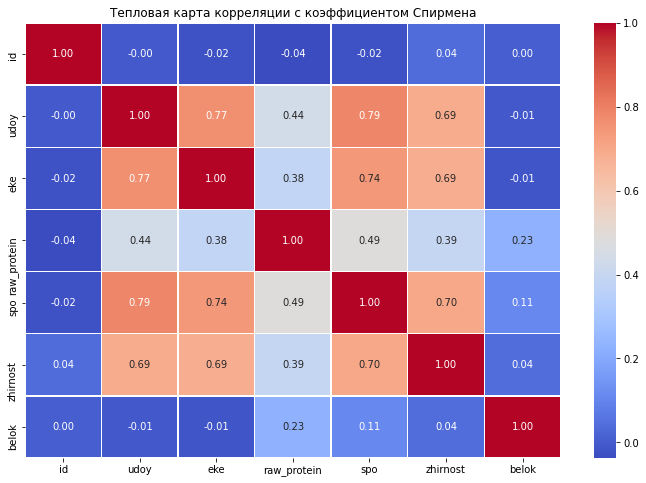

In [27]:
correlation(udoy_lim)

По шкале Чеддока высокая линейная связь есть между удоем и СПО (0.8), а еще удоем и ЭКЕ (0.77) и удоем и жирностью (0.7). Умеренная связь наблюдается также между удоем и сырым протеином (0.45).

Соберем цикл, который будет строить диаграммы рассеяния для каждого количественного признака основного датафрейма. Он будет использовать цвет, чтобы выделить категориальный признак - породу коровы. Другие категориальные признаки рассмотрим в следующих клетках с помощью аналогичного цикла: использование нескольких признаков на одной диаграмее усложнит прочтение.

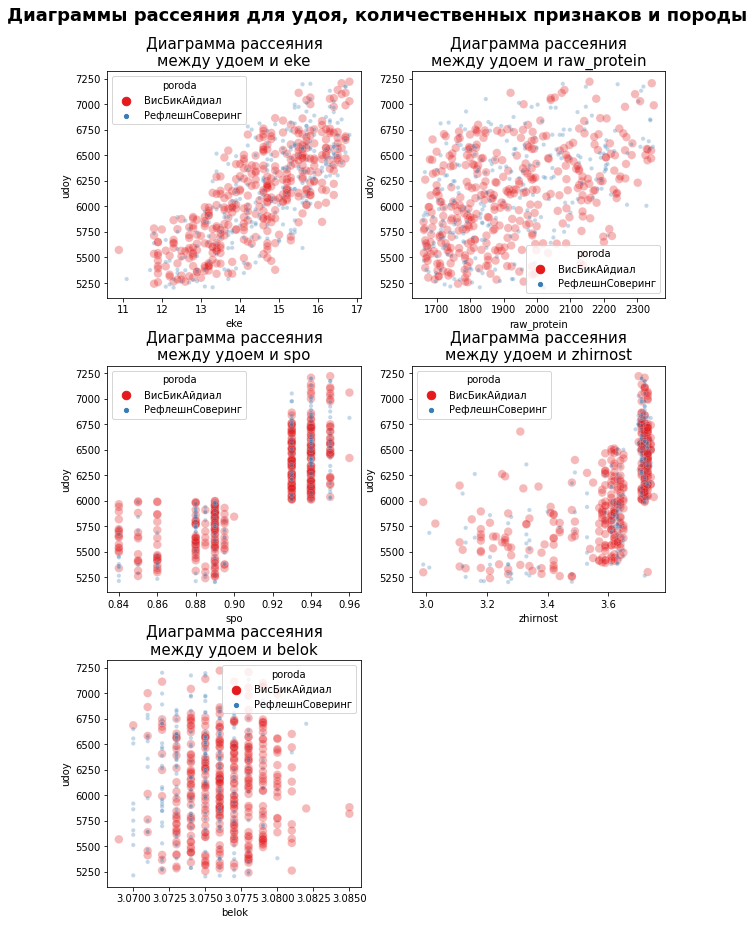

In [28]:
#создадим список с нужными колонками 
columns_relation = udoy_lim[['eke', 'raw_protein', 'spo', 'zhirnost', 'belok']]

#параметры визуализации                            
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
plt.subplots_adjust(hspace=0.3)
fig.suptitle("Диаграммы рассеяния для удоя, количественных признаков и породы", fontsize=18, y=0.94, fontweight='bold')

#соберем цикл, который будет искать нужные значения из списка в срезе и строить по ним графики:
for n, col in enumerate(columns_relation):
    ax = plt.subplot(3, 2, n + 1)
    sns.scatterplot(data=udoy_lim, x=udoy_lim[col], y=udoy_lim['udoy'], size='poroda',
                    hue='poroda', alpha=0.3, palette='Set1', marker='o')
    plt.title(f'Диаграмма рассеяния\nмежду удоем и {col}', fontsize=15)

axs[2, 1].set_axis_off()
plt.show()

1. Связь удоя и ЭКЕ: видна высокая линейная положительная взаимосвязь, признаки при этом увеличиваются неравномерно, а вразнобой. Она характерна для обеих пород коров. Тем не менее, связь есть и нелинейная: точки выстраиваются близко прямой, но часть из них распределяется довольно широко.


2. Связь удоя и сырого протеина: есть небольшая линейная положительная взаимосвязь. Я бы отметил, что она незначительно выше для породы Вис Бик Айдиал: точки в этом случае чуть ближе к линейному графику.


3. Связь удоя и СПО: по диаграмме видим положительную взаимосвязь: у коров с большим показателем удоя больше и СПО. Это характерно для обеих пород. Связь нелинейная, отчетливо видны два отдельных кластера по значениям.


4. В случае с жирностью корреляция тоже есть: чем больше удой, тем больше и жирность молока в нем. При этом по диаграмме видно, что в целом более жирное молоко дают коровы породы Рефлешн Соверинг.


5. Между удоем и белком корреляции нет, поэтому мы получили просто распределение показателей по белку внутри удоя. 

Повторим тот же цикл, только теперь будем использовать другой категориальный признак из датафрейма - возраст коровы.

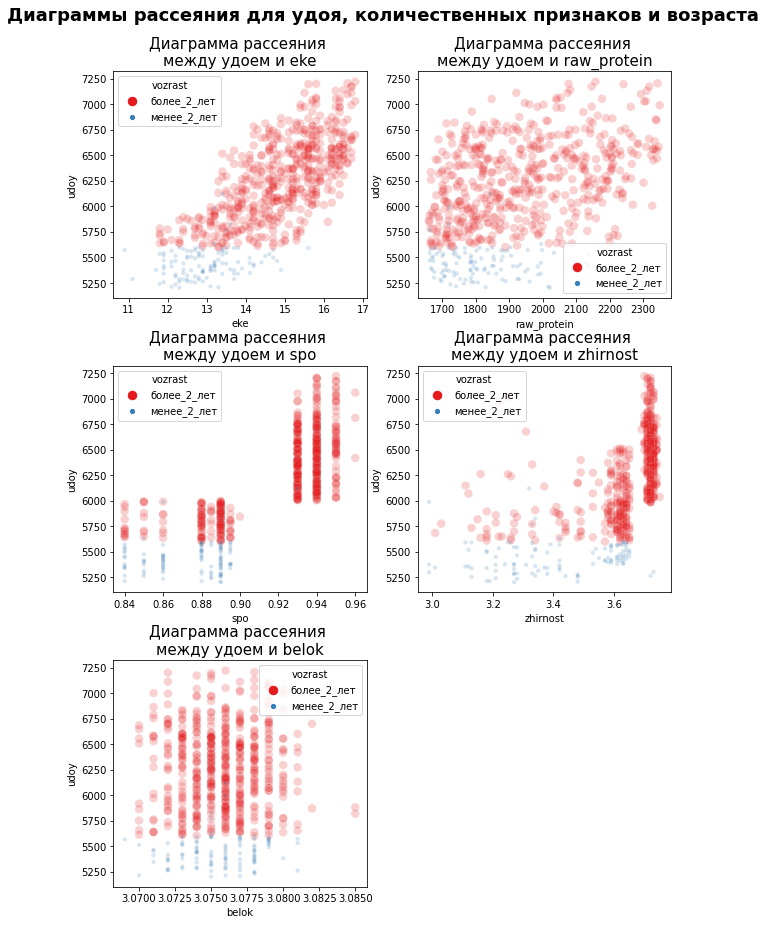

In [29]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
plt.subplots_adjust(hspace=0.3)
fig.suptitle("Диаграммы рассеяния для удоя, количественных признаков и возраста", fontsize=18, y=0.94, fontweight='bold')


#соберем цикл, которая будет искать нужные значения из списка в срезе и строить по ним графики:
for n, col in enumerate(columns_relation):
    ax = plt.subplot(3, 2, n + 1)
    sns.scatterplot(data=udoy_lim, x=udoy_lim[col], y= udoy_lim['udoy'], size='vozrast',
                    hue='vozrast', alpha=0.2, palette='Set1')
    plt.title(f'Диаграмма рассеяния \nмежду удоем и {col}', fontsize=15)
    
    axs[2,1].set_axis_off()

Картина изменилась: теперь на диаграммах гораздо сильнее видна связь между удоем и возрастом коровы.

1. Во всех диаграммах больше удоя дают коровы старше двух лет.


2. Увеличение ЭКЕ у коров старше двух лет приводит к росту объема удоев, а у молодых коров такой связи нет.

Повторим тот же цикл для другого категориального признака из датафрейма - типа пастбища.

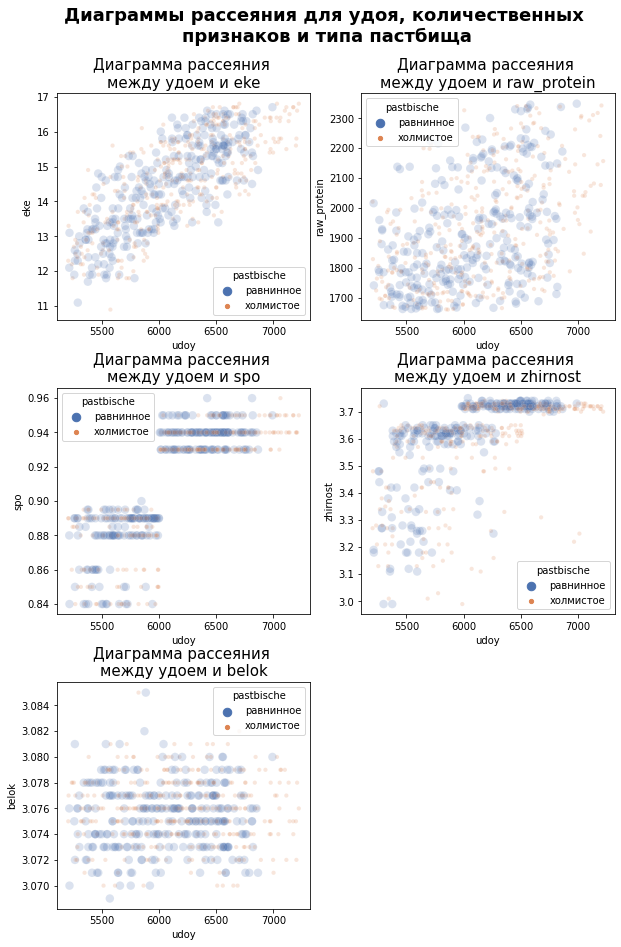

In [30]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
plt.subplots_adjust(hspace=0.3)
fig.suptitle("Диаграммы рассеяния для удоя, количественных \nпризнаков и типа пастбища", fontsize=18, y=0.96, fontweight='bold')


#соберем цикл, которая будет искать нужные значения из списка в срезе и строить по ним графики:
for n, col in enumerate(columns_relation):
    ax = plt.subplot(3, 2, n + 1)
    sns.scatterplot(data=udoy_lim, x=udoy_lim['udoy'], y= udoy_lim[col], size='pastbische',  
                    hue='pastbische', alpha=0.2, palette="deep")
    plt.title(f'Диаграмма рассеяния \nмежду удоем и {col}', fontsize=15)
    
    axs[2,1].set_axis_off()

1. У коров, которые пасутся на холмах, есть максимальные показатели ЭКЕ из всех коров.

2. У этих же коров более жирное молоко и выше показатель СПО.

3. Видим четкую кластеризацию по диаграмме рассеяния между удоем и СПО, можно определить порог значения как 0.90.

Теперь рассмотрим другой категориальный признак - вкус молока.

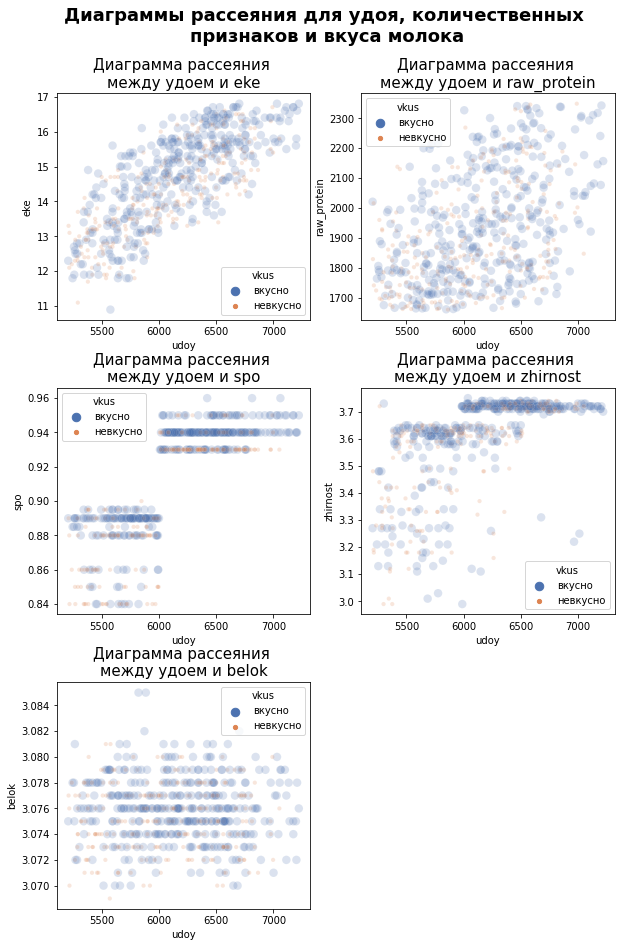

In [31]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
plt.subplots_adjust(hspace=0.3)
fig.suptitle("Диаграммы рассеяния для удоя, количественных \nпризнаков и вкуса молока", fontsize=18, y=0.96, fontweight='bold')


#соберем цикл, которая будет искать нужные значения из списка в срезе и строить по ним графики:
for n, col in enumerate(columns_relation):
    ax = plt.subplot(3, 2, n + 1)
    sns.scatterplot(data=udoy_lim, x=udoy_lim['udoy'], y= udoy_lim[col],  hue='vkus', size='vkus',
                    alpha=0.2, palette="deep")
    plt.title(f'Диаграмма рассеяния \nмежду удоем и {col}', fontsize=15)
    
    axs[2,1].set_axis_off()

1. У коров с высокой жирностью молока (3.6% и выше) молока чаще вкуснее.


2. У коров с вкусным молоком выше показатель СПО (0.94 и выше).

Повторим тот же цикл, только теперь будем использовать другой категориальный признак из датафрейма - породу папы.

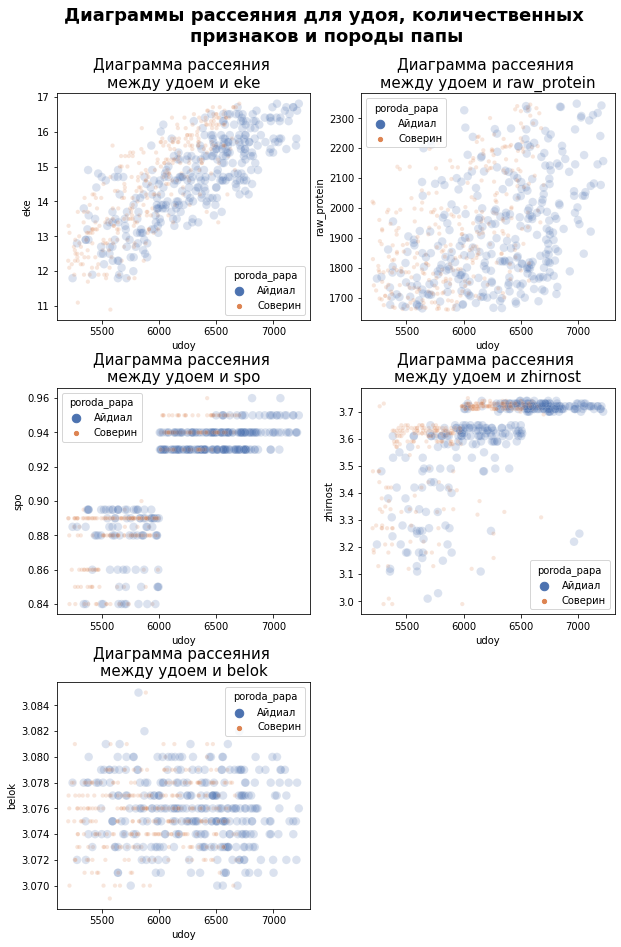

In [32]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
plt.subplots_adjust(hspace=0.3)
fig.suptitle("Диаграммы рассеяния для удоя, количественных \nпризнаков и породы папы", fontsize=18, y=0.96, fontweight='bold')

#соберем цикл, которая будет искать нужные значения из списка в срезе и строить по ним графики:
for n, col in enumerate(columns_relation):
    ax = plt.subplot(3, 2, n + 1)
    sns.scatterplot(data=udoy_lim, x=udoy_lim['udoy'], y= udoy_lim[col],  hue='poroda_papa', 
                    size='poroda_papa', alpha=0.2, palette="deep")
    plt.title(f'Диаграмма рассеяния \nмежду удоем и {col}', fontsize=15)
    axs[2,1].set_axis_off()

1. Больше удоя дают коровы, у которых отцы были породы айдиал.


2. Коровы с папой-айдиалом дают больше удоя при относительно схожем ЭКЕ, чем с папой-соверином.


3. Молоко у коров с папой-айдиалом чаще более жирное, а СПО выше.

#### Предварительные выводы после корреляционного анализа данных:

1. Между целевыми и частью входных признаков в основном датафрейме удалось найти линейную зависимость. По шкале Чеддока высокая линейная связь есть между удоем и СПО (0.8), а еще удоем и ЭКЕ (0.77) и удоем и жирностью (0.6). Умеренная связь наблюдается также между удоем и сырым протеином (0.45).


2. Линейная регрессия сработает хорошо, если будем использовать признаки с высокой линейной корреляцией: СПО и ЭКЕ.


3. Тем не менее, у СПО и ЭКЕ есть и нелинейная корреляция с удоем: это видно по диаграммам рассеяния, на которых можно выделить отдельные кластеры с четкими границами. В случае ЭКЕ точки выстраиваются близко прямой, но часть из них распределяется довольно широко.


4. При этом входные признаки, которые мы определили, не являются мультиколлинеарными: конечно, есть высокая корреляция между СПО и ЭКЕ (0.75), СПО и жирностью (0.63), но она ниже 0.9.

### Шаг 5. Задача регрессии

Обучим модели простой линейной регрессии, за целевой признак возьмем "Удой". Условия:

- Для первой модели возьмем все признаки, напрямую относящиеся к корове и корму. Признаки, характеризующие молоко (жирность, белок, вкус) брать не будем.


- Для второй модели входными признаками будем считать СПО и ЭКЕ. Жирность брать в этом случае не будем, так как из описания датасета следует, что этот признак не может определять целевой (жирность молока напрямую не влияет на удой), да и корреляция не такая сильная. Во второй модели признаки СПО и ЭКЕ являются мультиколлинеарными: на этапе подготовки данных для модели постараемся устранить этот тип связи.


- Для третьей модели добавим признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу.


Затем для всех моделей разобьем данные из основного датафрейма на тренировочную и тестовую выборки в соотношении 3:1. Далее посмотрим на размерность получившихся частей датасета, чтобы проверить разделение. Обучим модель и проверим коэффициент детерминации.

In [33]:
features_to_use = udoy_lim.drop(['udoy', 'zhirnost', 'belok', 'vkus'], axis=1).columns
target_variable = 'udoy'

#Вызовем функцию
trained_model_1, trained_scaler_1, trained_encoder_1 = train_and_predict(
    udoy_lim, features=features_to_use, target=target_variable, random_state=42
)

Параметр детерминации для модели: 0.803


Мы видим, что первая модель работает довольно корректно, коээфициент детерминации близок к единице. Чем ближе модель к единице, тем лучше ее обобщающая способность, а значит предсказания будут точными. Попробуем сравнить ее предсказание со значением тестовой выборки:

In [34]:
#Преобразуем тестовые данные
X_test_first = udoy_lim.loc[:, features_to_use]
X_test_numeric_scaled_first = trained_scaler_1.transform(X_test_first.select_dtypes(include=['number']))
X_test_encoded_first = trained_encoder_1.transform(X_test_first.select_dtypes(include=['object']))
X_test_processed_first = np.hstack((X_test_numeric_scaled_first, X_test_encoded_first))
y_test_first = udoy_lim.loc[:, target_variable]

#Получим предсказания
predictions_first = trained_model_1.predict(X_test_processed_first)

#Посмотрим на первые три предсказанные и реальные значения
for i in range(3):
    print(f'Предсказанное значение: {predictions_first[i]}, в реальности: {udoy_lim["udoy"].iloc[i]}')

Предсказанное значение: 5990.404506427548, в реальности: 5863
Предсказанное значение: 5474.231315353876, в реальности: 5529
Предсказанное значение: 5781.415356531557, в реальности: 5810


Проведем анализ остатков для первой модели:

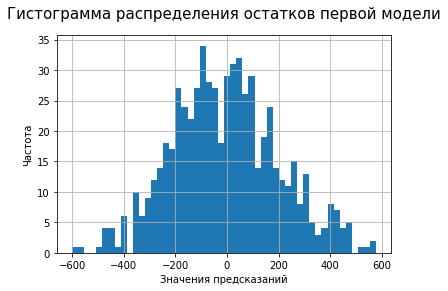

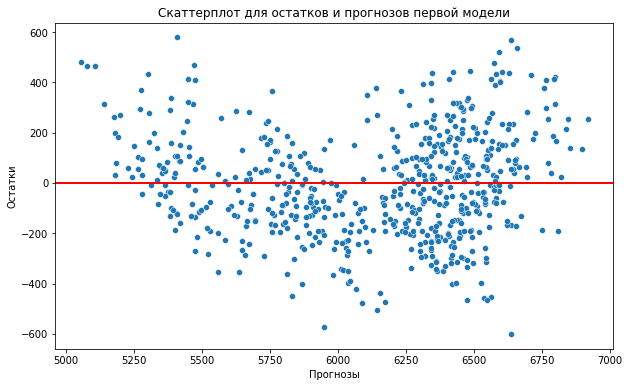

In [35]:
first_model_residuals = y_test_first - predictions_first 
first_model_residuals.hist(bins=50)
plt.title('Гистограмма распределения остатков первой модели', fontsize=15, y=1.05)
plt.xlabel('Значения предсказаний')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions_first, y=first_model_residuals)
plt.axhline(y=0, color='r', linewidth=2)
plt.title('Скаттерплот для остатков и прогнозов первой модели')
plt.xlabel('Прогнозы')
plt.ylabel('Остатки')
plt.show()

Гистограмма по распределению остатков распределена блико к норме, но при этом есть отдельные пики, а сам график не до конца сбалансирован относительно нуля по отрицательным и положительным значениям.

Мы видим, что скаттерплот "остатки-прогноз" напоминает по форме дугу. Возможно, это связано с тем, что текущая модель недостаточно точно определяет нелинейные закономерности в данных. 

**Предварительные выводы для первой модели линейной регрессии**

Первая модель работает довольно корректно, коээфициент детерминации близок к единице. При этом гистограмма по распределению остатков распределена блико к норме, но при этом есть отдельные пики, а сам график не до конца сбалансирован относительно нуля по отрицательным и положительным значениям.

Скаттерплот "остатки-прогноз" близок по форме к дуге, что наводит на мысль о неточном определении нелинейной связи между признаками. 

Для второй модели попробуем исключить нелинейность СПО и ЭКЕ, чтобы повысить информативность признаков для модели линейной регрессии. 

Для СПО используем преобразование в категориальный бинарный признак, исходя из границ кластеров на диаграмме рассеяния. В случае с ЭКЕ создадим новый признак: ЭКЕ в квадрате. Перед подготовкой данных проведем нужные преобразования.

In [36]:
#в новом столбце разделим значения в СПО по границе в 0.92: больше 0.92 примет значения 1, меньше - 0.
#используем для этого маску

mask1 = ((udoy_lim['spo'] <= .92))

# С помощью loc выберем значения СПО меньше или равные 0.92, в новом столбце передадим им значение 0
udoy_lim.loc[mask1, 'spo_kat'] = 'Меньше_порога'

# С помощью loc выберем значения СПО больше 0.92, в новом столбце передадим им значение 1
udoy_lim.loc[~mask1, 'spo_kat'] = 'Больше_порога'

#В новом столбце ЭКЕ2 возведем значения из ЭКЕ в квадрат
udoy_lim['eke_2'] = udoy_lim['eke']**2

udoy_lim.head()

,id,udoy,eke,raw_protein,spo,poroda,pastbische,poroda_papa,zhirnost,belok,vkus,vozrast,spo_kat,eke_2
0,1,5863,14.2,1743,0.890,ВисБикАйдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Меньше_порога,201.64
1,2,5529,12.8,2138,0.890,ВисБикАйдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Меньше_порога,163.84
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,невкусно,более_2_лет,Меньше_порога,196.00
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,невкусно,более_2_лет,Меньше_порога,153.76
4,5,5302,12.8,1675,0.885,ВисБикАйдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Меньше_порога,163.84


Вызовем функцию для подготовки и обучения второй модели:

In [37]:
#Определим признаки и целевую переменную
features_to_use = udoy_lim.drop(['udoy', 'zhirnost', 'belok', 'vkus'], axis=1).columns
target_variable = 'udoy'

#Вызовем функцию
trained_model_2, trained_scaler_2, trained_encoder_2 = train_and_predict(
    udoy_lim, features=features_to_use, target=target_variable, random_state=42
)

#Преобразуем тестовые данные
X_test_second = udoy_lim.loc[:, features_to_use]
X_test_numeric_scaled_second = trained_scaler_2.transform(X_test_second.select_dtypes(include=['number']))
X_test_encoded_second = trained_encoder_2.transform(X_test_second.select_dtypes(include=['object']))
X_test_processed_second = np.hstack((X_test_numeric_scaled_second, X_test_encoded_second))
y_test_second = udoy_lim.loc[:, target_variable]

#Получим предсказания
predictions_second = trained_model_2.predict(X_test_processed_second)

#Посмотрим на первые три предсказанные и реальные значения
for i in range(3):
    print(f'Предсказанное значение: {predictions_second[i]}, в реальности: {udoy_lim["udoy"].iloc[i]}')

Параметр детерминации для модели: 0.823
Предсказанное значение: 5869.669274255342, в реальности: 5863
Предсказанное значение: 5410.849683827277, в реальности: 5529
Предсказанное значение: 5694.226241117297, в реальности: 5810


Вторая модель работает немного лучше первой согласно коэффициенту детерминации, а значит, ее предсказания могут быть более точными. Проведем анализ остатков для второй модели и построим гистограмму и скаттерплот, чтобы понять, насколько получилось минимизировать влияние нелинейных связей в этой модели:

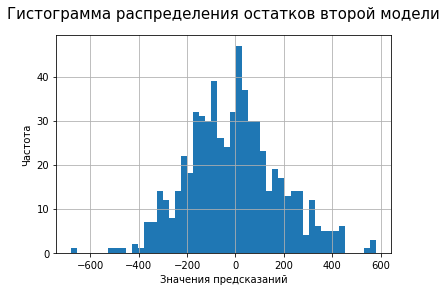

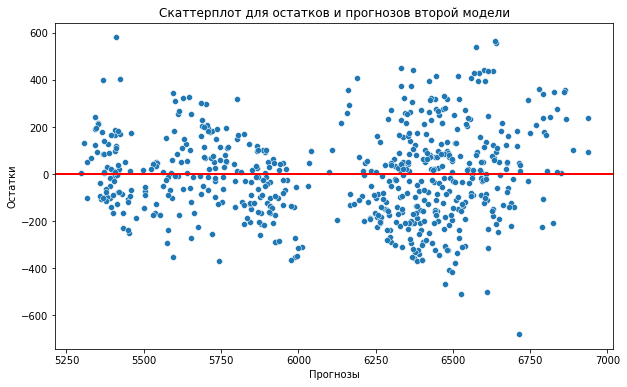

In [38]:
second_model_residuals = y_test_second - predictions_second
second_model_residuals.hist(bins=50)
plt.title('Гистограмма распределения остатков второй модели', fontsize=15, y=1.05)
plt.xlabel('Значения предсказаний')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions_second, y=second_model_residuals)
plt.axhline(y=0, color='r', linewidth=2)
plt.title('Скаттерплот для остатков и прогнозов второй модели')
plt.xlabel('Прогнозы')
plt.ylabel('Остатки')
plt.show()

**Предварительные выводы для второй модели линейной регрессии**

График стал более симметричным относительно нуля, а отрицательные и положительные значения лучше уравновешивают друг друга. Сам график немного сместился вправо относительно нуля: это значит, что прогнозы модели могут быть меньше истинных значений, в отличие от первой модели.

При этом скаттерплот по остаткам регрессии стал ближе к гетероскедастичности: он уже не похож на дугу, но нелинейная зависимость все еще есть.

Продолжим эксперименты в третьей модели!

Добавим признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу. Далее возьмем его за входной признак.

In [39]:
udoy_lim = udoy_lim.join(ferma_dad.set_index('id'), on='id')
udoy_lim.head(2)

,id,udoy,eke,raw_protein,spo,poroda,pastbische,poroda_papa,zhirnost,belok,vkus,vozrast,spo_kat,eke_2,imya_papa
0,1,5863,14.2,1743,0.89,ВисБикАйдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Меньше_порога,201.64,Буйный
1,2,5529,12.8,2138,0.89,ВисБикАйдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Меньше_порога,163.84,Соловчик


In [40]:
#Определим признаки и целевую переменную
features_to_use = udoy_lim.drop(['id', 'udoy', 'zhirnost', 'belok', 'vkus'], axis=1).columns
target_variable = 'udoy'

#Вызовем функцию
trained_model_3, trained_scaler_3, trained_encoder_3 = train_and_predict(
    udoy_lim, features=features_to_use, target=target_variable, random_state=42
)

#Преобразуем тестовые данные
X_test_third = udoy_lim.loc[:, features_to_use]
X_test_numeric_scaled_third = trained_scaler_3.transform(X_test_third.select_dtypes(include=['number']))
X_test_encoded_third = trained_encoder_3.transform(X_test_third.select_dtypes(include=['object']))
X_test_processed_third = np.hstack((X_test_numeric_scaled_third, X_test_encoded_third))
y_test_third = udoy_lim.loc[:, target_variable]

#Получим предсказания
predictions_third = trained_model_3.predict(X_test_processed_third)

#Посмотрим на первые три предсказанные и реальные значения
for i in range(3):
    print(f'Предсказанное значение: {predictions_third[i]}, в реальности: {udoy_lim["udoy"].iloc[i]}')

Параметр детерминации для модели: 0.837
Предсказанное значение: 5928.382751546362, в реальности: 5863
Предсказанное значение: 5478.01631787034, в реальности: 5529
Предсказанное значение: 5750.974620547718, в реальности: 5810


In [41]:
features_to_use

Index(['eke', 'raw_protein', 'spo', 'poroda', 'pastbische', 'poroda_papa',
       'vozrast', 'spo_kat', 'eke_2', 'imya_papa'],
      dtype='object')

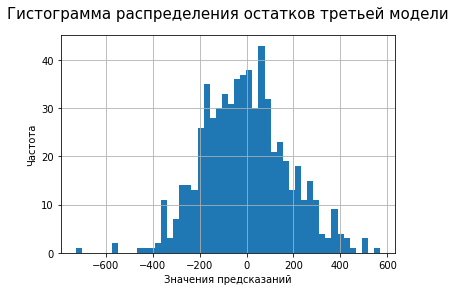

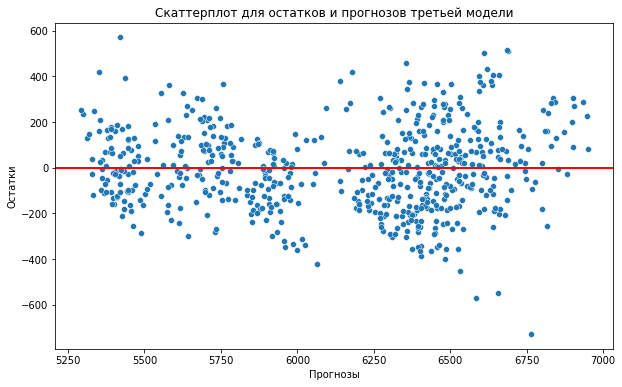

In [42]:
third_model_residuals = y_test_third - predictions_third
third_model_residuals.hist(bins=50)
plt.title('Гистограмма распределения остатков третьей модели', fontsize=15, y=1.05)
plt.xlabel('Значения предсказаний')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions_third, y=third_model_residuals)
plt.axhline(y=0, color='r', linewidth=2)
plt.title('Скаттерплот для остатков и прогнозов третьей модели')
plt.xlabel('Прогнозы')
plt.ylabel('Остатки')
plt.show()

**Предварительные выводы для третьей модели линейной регрессии**

График несимметричен относительно нуля, а отрицательные и положительные значения не до конца уравновешивают друг друга. Сам график немного сильнее сместился вправо относительно нуля по сравнению с другими моделями: это значит, что модель часто даёт предсказания, которые меньше реальных, её прогнозы меньше истинных значений, в отличие от второй модели.

Сравним качество трёх моделей линейной регрессии, сопоставим их R² и остатки:

Пока самой близкой к единице по R² является третья модель: несмотря на то, что она еще далека от нормального распределения по анализу остатков, для прогноза удоя будем использовать именно ее. Хуже всего себя показывает первая модель: предполагаю, это связано с наличием нелинейной связи между входными признаками.

Оценим качество каждой модели по трём метрикам: MSE, MAE, RMSE. 

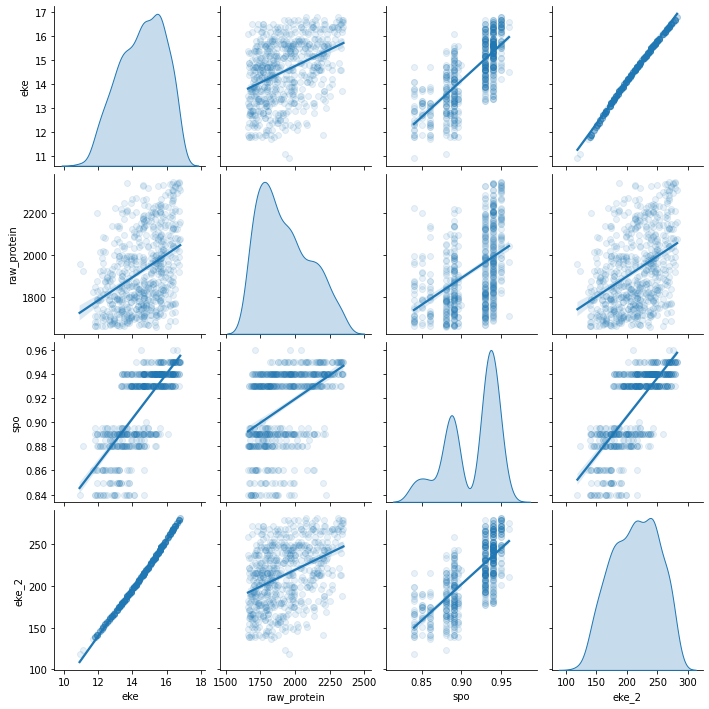

In [43]:
X_train_third = udoy_lim.loc[:, features_to_use]
y_train_third = udoy_lim.loc[:, target_variable]
train_dataset = X_train_third.copy()
_ = sns.pairplot(
    train_dataset[
        ['eke', 'raw_protein', 'spo', 'poroda', 
         'pastbische', 'poroda_papa', 'vozrast', 'spo_kat',
        'eke_2', 'imya_papa']
    ],
    kind="reg",
    diag_kind="kde",
    plot_kws={"scatter_kws": {"alpha": 0.1}},
)

In [44]:
def calculate_metrics(predictions, y_test):
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mae = mean_absolute_error(y_test, predictions)
    
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae}

print(
    f'Значения метрик для первой модели: {calculate_metrics(predictions_first, y_test_first)}'
)
print()
print(
    f'Значения метрик для второй модели: {calculate_metrics(predictions_second, y_test_second)}'
)
print()
print(
    f'Значения метрик для третьей модели: {calculate_metrics(predictions_third, y_test_third)}'
)

Значения метрик для первой модели: {'MSE': 42401.806972791084, 'RMSE': 205.91699049080697, 'MAE': 165.37675915217932}

Значения метрик для второй модели: {'MSE': 35817.564013276504, 'RMSE': 189.2552879400639, 'MAE': 149.55182808833337}

Значения метрик для третьей модели: {'MSE': 32870.790556768574, 'RMSE': 181.30303515597464, 'MAE': 143.60319529064776}


Мы видим, что оценка точности по каждой из метрик отличается. Это можно объяснить уровнем устойчивости к выбросам каждой из метрик. Наиболее устойчивая из них MAE: она показывает, что третья модель является наиболее точной из трех.

При этом RMSE довольно близка к MAE для всех трех моделей: это значит, что выбросов и аномальных значений, которые влияют на RMSE и MSE, в наборе не так много.

Посчитаем доверительный интервал для прогнозов третьей модели с помощью norm.interval. Мы можем это делать, так как выборка у нас большая (>30). Благодаря ЦМТ можно предположить, что выборочное распределение выборочного среднего нормально распределено. Уровень достоверности выберем как 0.99 для большей точности. 

In [45]:
stats.norm.interval(confidence=.99, loc=np.mean(predictions_third), 
                    scale=stats.sem(predictions_third))

(6085.532676572444, 6175.835796034906)

Доверительный интервал третьей модели лежит в промежутке от 6085 кг удоя в год до 6175.8 кг удоя в год. 

С помощью лучшей модели спрогнозируем удой коров, которых фермер хочет купить. Для этого сперва добавим в датафрейм с коровами на покупку недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмем из датасета ferma_main.csv средние значения каждого из признаков и увеличьте их на 5%. 

Для подготовки приведем cow_buy в такой же порядок столбцов, как и в основном датафрейме, а еще унифицируем названия столбцов. 

In [46]:
cow_buy['eke'] = (udoy_lim['eke'].mean() * 1.05).round(1)
cow_buy['raw_protein'] = (udoy_lim['raw_protein'].mean() * 1.05).astype('int')
cow_buy['spo'] = udoy_lim['spo'].mean() * 1.05
cow_buy['udoy'] = 0

def f(row):
    if row['spo'] >= 0.9:
        val = 'Больше_порога'
    else:
        val = 'Меньше_порога'
    return val

cow_buy['spo_kat'] = cow_buy.apply(f, axis=1)

cow_buy_new = cow_buy.reindex(columns=['udoy', 'eke', 'raw_protein', 'spo', 'poroda',
                                      'pastbische', 'poroda_papa', 'zhirnost', 'belok', 
                                       'vozrast', 'spo_kat'])
display(cow_buy_new.head(2))
display(udoy_lim.head(2))

,udoy,eke,raw_protein,spo,poroda,pastbische,poroda_papa,zhirnost,belok,vozrast,spo_kat
0,0,15.3,2019,0.958744,ВисБикАйдиал,холмистое,Айдиал,3.58,3.076,более_2_лет,Больше_порога
1,0,15.3,2019,0.958744,ВисБикАйдиал,равнинное,Соверин,3.54,3.081,менее_2_лет,Больше_порога


,id,udoy,eke,raw_protein,spo,poroda,pastbische,poroda_papa,zhirnost,belok,vkus,vozrast,spo_kat,eke_2,imya_papa
0,1,5863,14.2,1743,0.89,ВисБикАйдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Меньше_порога,201.64,Буйный
1,2,5529,12.8,2138,0.89,ВисБикАйдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Меньше_порога,163.84,Соловчик


Используем ранее натренированные model, scaler и encoder из третьей модели (самой успешной), чтобы сразу получить предсказания по удою.

In [47]:
# Определим признаки для предсказания
features_to_use = cow_buy_new.drop(['udoy', 'zhirnost', 'belok'], axis=1).columns
target_variable = 'udoy'

#Вызовем функцию
trained_model_3, trained_scaler_3, trained_encoder_3 = train_and_predict(
    udoy_lim, features=features_to_use, target=target_variable, random_state=42
)

# Преобразуем тестовые данные
X_test_final = cow_buy_new.loc[:, features_to_use]
X_test_numeric_scaled_final = trained_scaler_3.transform(X_test_final.select_dtypes(include=['number']))
X_test_encoded_final = trained_encoder_3.transform(X_test_final.select_dtypes(include=['object']))
X_test_processed_final = np.hstack((X_test_numeric_scaled_final, X_test_encoded_final))
y_test_final = cow_buy_new.loc[:, target_variable]

# Получим предсказания
predictions_final = trained_model_3.predict(X_test_processed_final)

# Посмотрим на все предсказанные значения
for i in range(20):
    print(f'Предсказанное значение: {predictions_final[i]}')

Параметр детерминации для модели: 0.818
Предсказанное значение: 6557.443137292659
Предсказанное значение: 6093.683558565693
Предсказанное значение: 6322.100359871339
Предсказанное значение: 6563.392892242876
Предсказанное значение: 6523.887794609918
Предсказанное значение: 6099.633313515909
Предсказанное значение: 6557.443137292659
Предсказанное значение: 6316.150604921122
Предсказанное значение: 6322.100359871339
Предсказанное значение: 6340.925845887446
Предсказанное значение: 6355.65570255408
Предсказанное значение: 6322.100359871339
Предсказанное значение: 6557.443137292659
Предсказанное значение: 6133.188656198649
Предсказанное значение: 6322.100359871339
Предсказанное значение: 6563.392892242876
Предсказанное значение: 6355.65570255408
Предсказанное значение: 6099.633313515909
Предсказанное значение: 6316.150604921122
Предсказанное значение: 6523.887794609918


Здесь мы видим, что посчитать R² по предсказанным значениям сложно, так как признаков удоя нет по коровам на продажу. Тем не менее, для расчета использовали третью модель. Исходя из этого, будем считать, что у текущих предсказаний такой же (или похожий) коэффициент R².

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



Метрики для cow_buy почитать невозможно, потому что у нас нет истинного лейбла


**Предварительные выводы по регрессиям:**

- Подготовили данные датасетов с коровами фермера и коровами на покупку для трех моделей линейной регрессии. Первая работала менее точно, скорее всего, из-за нелинейной связи между входными признаками и невысокой линейной связи у части входных признаков с целевым. Такой вывод сделали по R2 и анализу остатков.


- Для второй модели использовали входные признаки с высокой линейной связью и минимизированной нелинейной: СПО и ЭКЕ. Перед этим исключим нелинейность, чтобы повысить информативность признаков для модели линейной регрессии. Это дало плоды: R2 модели 0.84.


- Для третьй модели использовали новый признак, Имя Папы, а еще входные признаки с высокой линейной связью: СПО и ЭКЕ. Модель показала лучшие результаты из всех трех: ее использовали для предсказания удоя коров на покупку.


- Предсказали удой коров на покупку за год: из 20 коров 9 преодолели барьер в 6000 кг.

In [48]:
confidence_level = 0.95

confidence_intervals = stats.t.interval(
    confidence_level,
    df=len(X_test_processed_final) - 1, 
    loc=np.mean(predictions_final),
    scale=stats.sem(predictions_final)
)

print(f'Доверительный интервал для предсказаний по коровам на покупку: {confidence_intervals}')

Доверительный интервал для предсказаний по коровам на покупку: (6284.780437758039, 6439.816515012254)


### Шаг 6. Задача классификации

Подготовим данные датасета ferma_main.csv и обучите на них модель LogisticRegression.

In [49]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42

# разбиваем признаки на входные и целевой
X_class = udoy_lim[['raw_protein', 'poroda', 'pastbische', 
                    'imya_papa', 'vozrast', 'eke_2', 'spo_kat', 'zhirnost', 'belok']]
y_class = udoy_lim['vkus']


# разбиваем данные на тренировочную и тестовую выборки
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, 
    y_class, 
    random_state=RANDOM_STATE
)

print(X_train_class.shape)
print(X_test_class.shape)
print(y_train_class.shape)
print(y_test_class.shape)

(471, 9)
(157, 9)
(471,)
(157,)


In [50]:
encoder_1 = OneHotEncoder(drop='first', sparse=False)

ferma_cat_names_taste = ['imya_papa', 'spo_kat', 'poroda', 'pastbische', 'vozrast']
ferma_col_names_taste = ['raw_protein', 'eke_2', 'zhirnost', 'belok']

X_train_class_encoded = encoder_1.fit_transform(X_train_class[ferma_cat_names_taste])
X_test_class_encoded = encoder_1.transform(X_test_class[ferma_cat_names_taste]) 

encoder_cat_names = encoder_1.get_feature_names(ferma_cat_names_taste)
X_train_class_encoded_df = pd.DataFrame(X_train_class_encoded, columns=encoder_cat_names) 
X_test_class_encoded_df = pd.DataFrame(X_test_class_encoded, columns=encoder_cat_names) 

scaler_1 = StandardScaler()

X_train_class_scaled = scaler_1.fit_transform(X_train_class[ferma_col_names_taste])
X_test_class_scaled = scaler_1.transform(X_test_class[ferma_col_names_taste])

X_train_class_scaled_df = pd.DataFrame(X_train_class_scaled, columns=[ferma_col_names_taste])
X_test_class_scaled_df = pd.DataFrame(X_test_class_scaled, columns=[ferma_col_names_taste])

X_train_processed = pd.concat([X_train_class_scaled_df, X_train_class_encoded_df], axis=1)
X_test_processed = pd.concat([X_test_class_scaled_df, X_test_class_encoded_df], axis=1)

display(X_test_processed[:1])

,"(raw_protein,)","(eke_2,)","(zhirnost,)","(belok,)",imya_papa_Буйный,imya_papa_Геркулес,imya_papa_Соловчик,spo_kat_Меньше_порога,poroda_РефлешнСоверинг,pastbische_холмистое,vozrast_менее_2_лет
0,-0.813322,-0.527089,0.201807,0.094429,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [51]:
#создаём объект для работы с моделью
clf = LogisticRegression(random_state = 42)

#обучаем модель на данных
clf_1 = clf.fit(X_train_processed, y_train_class)

#получаем прогнозные метки классов
y_pred = clf_1.predict(X_test_processed)

#проводим оценку точности
acc = accuracy_score(y_test_class, y_pred)
print(f'Оценка точности для модели логистической регрессии: {acc}')

Оценка точности для модели логистической регрессии: 0.6305732484076433


Модель работает не совсем точно: согласно accuracy, она не очень близка к единице. Но accuracy - не лучший инструмент для оценки эффективности нашей классификации. Попробуем построить матрицу ошибок:

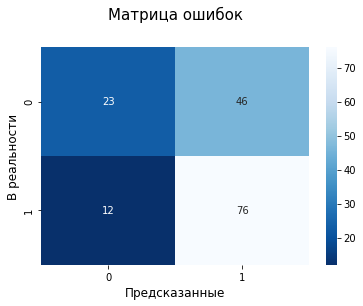

In [52]:
y_test_numeric = y_test_class.map({'невкусно': 0, 'вкусно': 1})
y_pred_numeric = pd.Series(y_pred).map({'невкусно': 0, 'вкусно': 1})

cm = confusion_matrix(y_test_numeric, y_pred_numeric)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок', fontsize=15, y=1.1)
plt.ylabel('В реальности', fontsize=12)
plt.xlabel('Предсказанные', fontsize=12)
plt.show()

По матрице ошибок мы видим, что ошибок первого рода (модель неправильно предсказала положительный класс) больше, чем ошибок второго типа (неверное предсказание, что молоко невкусное): 56 и 13. Посчитаем вклад ошибок разного рода в работу модели с помощью precision и recall.

In [53]:
recall = recall_score(y_test_numeric, y_pred_numeric)
precision = precision_score(y_test_numeric, y_pred_numeric)

print('recall:', round(recall, 3))
print('precision:', round(precision, 3))

recall: 0.864
precision: 0.623


Precision показывает, что почти половина из предсказаний коров с вкусным молоком оказалась неправильной (ложноположительные предсказания).

Так как главное для фермера - получить объективно вкусное молоко, в данном случае важно верно предсказывать, вкусное ли молоко или нет, а значит, преотвращать ошибки первого рода. Выходит, для этой ситуации более важной будет метрика precision. Значит, нужно найти порог, который позволит повысить это значение. Для этого соберем датафрейм для регулирования порога.

In [54]:
#создаем объект LabelEncoder
label_encoder = LabelEncoder()

#преобразуем строковые метки в числовой формат
y_test_numeric = label_encoder.fit_transform(y_test_class)

clf_1.fit(X_train_processed, y_train_class)
y_pred = clf_1.predict(X_test_processed)

#получаем вероятности принадлежности к классам
proba = clf_1.predict_proba(X_test_processed)[:, 1]

#создаем список порогов, которые будем проверять
thresholds_to_check = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

#создаем пустой DataFrame для хранения результатов
results_df = pd.DataFrame(columns=['Порог', 'Recall', 'Precision', 'Accuracy'])

#цикл по порогам
for threshold in thresholds_to_check:
    # преобразуем вероятности в метки классов с учетом порога
    y_pred_numeric = (proba >= threshold).astype(int)
    
    # рассчитываем метрики
    recall = recall_score(y_test_numeric, y_pred_numeric)
    precision = precision_score(y_test_numeric, y_pred_numeric, zero_division=1)
    accuracy = accuracy_score(y_test_numeric, y_pred_numeric)
    
    # добавляем результаты в DataFrame
    results_df = results_df.append({'Порог': threshold, 
                                    'Recall': recall, 
                                    'Precision': precision, 'Accuracy': accuracy}, ignore_index=True)
results_df

,Порог,Recall,Precision,Accuracy
0,0.2,0.985507,0.459459,0.484076
1,0.3,0.884058,0.539823,0.617834
2,0.4,0.623188,0.682540,0.707006
3,0.5,0.333333,0.657143,0.630573
4,0.6,0.130435,0.562500,0.573248
5,0.7,0.014493,1.000000,0.566879
6,0.8,0.000000,1.000000,0.560510


В нашем случае порог лучше установить cредний (0.5), чтобы увеличить показатель Precision, но при этом сохранить рекомендации по корове с учетом шума данных: важно точно определять коров со вкусным молоком! Обновим предсказания с учетом порога:

In [55]:
#создаем объект LabelEncoder
label_encoder_1 = LabelEncoder()

#преобразуем строковые метки в числовой формат
y_test_numeric = label_encoder_1.fit_transform(y_test_class)

clf_1.fit(X_train_processed, y_train_class)
y_pred = clf_1.predict(X_test_processed)

#получаем вероятности принадлежности к классам
proba = clf_1.predict_proba(X_test_processed)[:, 1]  # берем вероятности для положительного класса

#устанавливаем порог
threshold = 0.5

#преобразуем вероятности в метки классов с учетом выбранного порога
y_pred_with_threshold = (proba >= threshold).astype(int)

acc_with_threshold = accuracy_score(y_test_numeric, y_pred_with_threshold)
recall = recall_score(y_test_numeric, y_pred_with_threshold)
precision = precision_score(y_test_numeric, y_pred_with_threshold)

print(f'Оценка accuracy для модели с порогом {threshold}:{round(acc_with_threshold, 3)}')
print(f'Оценка recall для модели с порогом {threshold}: {round(recall, 3)}')
print(f'Оценка precision для модели с порогом {threshold}: {round(precision, 3)}')

Оценка accuracy для модели с порогом 0.5:0.631
Оценка recall для модели с порогом 0.5: 0.333
Оценка precision для модели с порогом 0.5: 0.657


Мы видим, что процент объектов положительного класса (вкусное молоко), которые модель правильно идентифицировала относительно всех объектов этого класса, остается большим. Значит, мы захватываем коров, которые дают вкусное молоко, а в нашей задаче это главное.

Исходя из анализа модели, в перспективе стоит работать над достоверностью предсказаний по классификации. Может быть, стоит проанализировать дополнительные факторы, например, более глубоко изучить корреляцию признаков, или добавить новые признаки, которые сильнее влияют на вкус молока. 

Перенесем модель на данные по cow_buy, но сперва подготовим сами данные, повторим те же шаги, что и раньше:

In [56]:
categorical_col_names = ['imya_papa', 'spo_kat', 'poroda', 'pastbische', 'vozrast']
numeric_col_names = ['raw_protein']

X_class = udoy_lim[categorical_col_names + numeric_col_names]
y_class = udoy_lim['vkus']

#Создание трансформатора столбцов для кодирования и масштабирования
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_col_names),
        ('num', StandardScaler(), numeric_col_names)
    ]
)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, 
    y_class, 
    random_state=42
)

#Применение трансформатора столбцов к обучающим данным
X_train_class_transformed = preprocessor.fit_transform(X_train_class)

clf_1.fit(X_train_class_transformed, y_train_class)

#Получение прогнозируемых меток для тестовых данных
X_test_class_transformed = preprocessor.transform(X_test_class)
y_pred = clf_1.predict(X_test_class_transformed)

acc = accuracy_score(y_test_class, y_pred)
print(f'Оценка точности для модели логистической регрессии: {round(acc, 3)}')

Оценка точности для модели логистической регрессии: 0.561


In [57]:
X_new_cows_transformed = preprocessor.transform(cow_buy[categorical_col_names + numeric_col_names])

#Получение прогнозируемых вероятностей для новых данных
new_data_probas = clf_1.predict_proba(X_new_cows_transformed)[:, 1]

#Применение порога для получения прогнозируемых меток
selected_threshold = 0.5
predicted_labels = (new_data_probas >= selected_threshold).astype(int)

#Добавление прогнозов и вероятностей в датафрейм
cow_buy['vkus_prognoz'] = predicted_labels
cow_buy['udoy_prognoz']= predictions_final
cow_buy['vkus_prognoz'] = (cow_buy['vkus_prognoz'].replace(0, 'невкусно')
                           .replace(1, 'вкусно')
                          )
#Вывод обновленного датафрейма
display(cow_buy)

,poroda,pastbische,poroda_papa,imya_papa,zhirnost,belok,vozrast,eke,raw_protein,spo,udoy,spo_kat,vkus_prognoz,udoy_prognoz
0,ВисБикАйдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.3,2019,0.958744,0,Больше_порога,невкусно,6557.443137
1,ВисБикАйдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.3,2019,0.958744,0,Больше_порога,вкусно,6093.683559
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.3,2019,0.958744,0,Больше_порога,невкусно,6322.100360
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.3,2019,0.958744,0,Больше_порога,невкусно,6563.392892
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.3,2019,0.958744,0,Больше_порога,невкусно,6523.887795
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.3,2019,0.958744,0,Больше_порога,вкусно,6099.633314
6,ВисБикАйдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.3,2019,0.958744,0,Больше_порога,невкусно,6557.443137
7,ВисБикАйдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.3,2019,0.958744,0,Больше_порога,невкусно,6316.150605
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.3,2019,0.958744,0,Больше_порога,невкусно,6322.100360
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.3,2019,0.958744,0,Больше_порога,невкусно,6340.925846


Отберем коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко:

In [58]:
cow_buy.query("(udoy_prognoz >= 6000) & (vkus_prognoz == 'вкусно')")

,poroda,pastbische,poroda_papa,imya_papa,zhirnost,belok,vozrast,eke,raw_protein,spo,udoy,spo_kat,vkus_prognoz,udoy_prognoz
1,ВисБикАйдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.3,2019,0.958744,0,Больше_порога,вкусно,6093.683559
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.3,2019,0.958744,0,Больше_порога,вкусно,6099.633314
17,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет,15.3,2019,0.958744,0,Больше_порога,вкусно,6099.633314


Мы видим, что из всех предлагаемых для покупки коров фермер на текущий момент может купить с минимальным риском для себя три коровы. Иначе он может столкнуться с ошибками первого рода: без высокого порога precision у нашей модели пока не очень высокий. 

Из рекомендаций, которые можно дать фермеру: попробовать выделить новые входные признаки, которые будут сильнее коррелировать со вкусом молока. Мы видим, что accuracy у модели, обученной по основному датасету, не отличается высокими показателями: 0.56. Это значит, что или между входными признаками есть нелинейная связь, или они не очень сильно линейно влияют на вкус.

### Выводы

1. Чтобы улучшить качество регрессионных моделей, мы:

- устранили нелинейную связь между признаками: преобразовали СПО в категориальный бинарный признак, а новый признак ЭКЕ возвели в квадрат.
- использовали метрику precision в случае с логистической регрессией: она позволила создать модель, направленную на бизнес-задачу: определять объективно вкусное молоко с высокой точностью.
- чтобы повысить точность предсказаний по вкусу молока и минимизировать бизнес-риски, мы использовали настройку порогов для значения предсказаний, взяли довольно высокий порог в 0.6.

2. Есть и другие способы повышения качества моделей:

- добавление новых признаков, которые могли бы улучшить предсказательную силу.
- создание более информативных признаков из уже существующих категориальных. К сожалению, здесь не хватает экспертизы по теме этой бизнес-задачи (какие признаки влияют на удой и вкус молока).
- анализ ошибок модели: более детально изучить матрицу ошибок, проанализировать, когда модель выдает ложные положительные и ложные отрицательные ответы. 

3. При анализе рисков или экономических расчетов с помощью моделей классификации важны следующие метрики:

- Accuracy: измеряет общую точность модели, но может быть недостаточной для анализа рода ошибок.
- Precision и Recall: Precision измеряет, как много из предсказанных положительных примеров действительно являются положительными. Recall измеряет, как много положительных примеров было обнаружено моделью. Эти метрики особенно важны в ситуациях, когда стоимость ошибок может быть высока, и важно минимизировать ложные срабатывания.
- Матрица ошибок (не совсем метрика): позволяет визуализировать количество верных/ложных срабатываний и упущений.